In [386]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,IsolationForest
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,IsolationForest,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_upload = pd.read_csv('transport_data.csv')
data_upload['log']=data_upload['log']-30
data_upload['lat']=data_upload['lat']-59
print(len(data_upload))

58665


In [387]:
data=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
print (data.head(5))
print (len(data[data.label=='0']))
print (len(data[data.label=='1']))
print (len(data[data.label=='2']))

print (data.tail(5))

         log       lat  request_ts    trans_ts label
0   0.295780  0.932167  1511956827  1511956594     0
8   0.385973  0.944260  1511956827  1511956782     0
13  0.374880  0.938213  1511956827  1511956802     1
17  0.347544  0.932667  1511956827  1511956811     0
23  0.312321  0.937405  1511956827  1511956820     2
4423
3372
2205
            log       lat  request_ts    trans_ts label
58641  0.306583  0.933365  1512302305  1512302205     0
58653  0.342030  0.933289  1512302335  1512302324     2
58655  0.370579  0.934475  1512302365  1512302342     0
58657  0.363417  0.930714  1512302365  1512302351     0
58662  0.306704  0.933582  1512302395  1512302377     0


In [388]:
from math import sqrt, fabs
def guess(data):
    res=list()
    num=list()
    l=0
    for index, i in data.iterrows():
        i1=i[1]
        i0=i[0]
        res.append(922337203685477)
        num.append(-1)
        for indexs, j in data.iterrows():
            j1=j[1]
            j2=j[2]
            j0=j[0]
            if(index!=indexs):
                dis=sqrt((i0-j0)*(i0-j0)+(i1-j1)*(i1-j1))
                last=res.pop()
                last_num=num.pop()
                if dis<last:
                    res.append(float(dis))
                    num.append(j2)
                else:
                    res.append(float(last))
                    num.append(last_num)
                if(dis==0):
                    break
        l+=1
        if(l%100==0):
            display(l)
            display(num[l-10:l])
            display(res[l-10:l])
    print(num)
    print(res)
    df=pd.DataFrame(data=num,columns=['guess'])
    return df
data['guess']=guess(data[['log','lat','label']])

KeyboardInterrupt: 

In [389]:
prev=['0', '0', '1', '0', '2', '0', '2', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '2', '2', '1', '0', '0', '1', '1', '0', '0', '2', '0', '2', '1', '0', '1', '2', '2', '0', '0', '1', '2', '2', '0', '0', '1', '0', '0', '2', '0', '0', '0', '1', '0', '2', '0', '0', '0', '2', '2', '2', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '2', '2', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '0', '0', '0', '0', '0', '2', '1', '0', '0', '1', '0', '0', '2', '0', '2', '2', '0', '1', '0', '0', '1', '2', '1', '1', '1', '2', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '2', '2', '1', '0', '1', '0', '1', '1', '1', '1', '2', '0', '1', '0', '1', '2', '0', '0', '0', '0', '0', '1', '1', '1', '1', '2', '1', '2', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '2', '0', '2', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '2', '0', '1', '1', '2', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '2', '2', '1', '1', '0', '1', '0', '1', '0', '2', '0', '2', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '2', '1', '0', '1', '0', '0', '0', '2', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '2', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '2', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '2', '0', '2', '2', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '2', '0', '1', '2', '0', '0', '1', '1', '0', '0', '0', '0', '2', '1', '1', '0', '2', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '2', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '2', '1', '0', '0', '2', '1', '0', '0', '0', '1', '0', '0', '1', '2', '2', '0', '0', '2', '0', '0', '2', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '2', '1', '0', '0', '1', '2', '2', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '2', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '2', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '2', '0', '2', '0', '0', '1', '0', '1', '0', '0', '1', '2', '0', '2', '1', '0', '1', '2', '0', '2', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '2', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '2', '0', '0', '1', '2', '0', '0', '0', '2', '0', '1', '1', '2', '2', '0', '2', '1', '0', '2', '2', '0', '2', '0', '0', '2', '0', '2', '1', '0', '2', '1', '0', '0', '2', '0', '0', '0', '0', '0', '2', '0', '2', '0', '0', '1', '0', '1', '0', '2', '1', '1', '1', '0', '1', '0', '1', '2', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '2', '0', '2', '0', '2', '1', '1', '1', '2', '1', '0', '2', '2', '0', '1', '0', '2', '1', '0', '2', '0', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '1', '0', '0', '1', '0', '2', '0', '0', '0', '2', '1', '1', '0', '0', '2', '2', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '2', '2', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '2', '1', '0', '0', '1', '1', '2', '0', '0', '1', '2', '0', '2', '1', '0', '0', '0', '0', '1', '0', '2', '0', '0', '0', '0', '0', '1', '0', '2', '1', '1', '1', '1', '0', '0', '2', '0', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '2', '1', '2', '0', '2', '0', '2', '0', '0', '0', '2', '0', '0', '1', '0', '2', '0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '2', '2', '0', '2', '2', '0', '1', '2', '0', '0', '2', '0', '0', '0', '0', '0', '2', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '2', '0', '1', '2', '0', '0', '2', '1', '1', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '0', '1', '1', '1', '0', '2', '1', '0', '2', '1', '1', '1', '1', '0', '1', '1', '2', '2', '1', '2', '2', '1', '0', '0', '0', '0', '0', '2', '1', '2', '0', '2', '0', '0', '0', '0', '0', '1', '1', '0', '1', '2', '0', '0', '1', '1', '2', '0', '1', '1', '0', '0', '0', '0', '2', '0', '0', '0', '0', '1', '0', '2', '2', '0', '0', '1', '1', '2', '0', '0', '0', '0', '2', '2', '1', '1', '1', '0', '0', '0', '0', '0', '2', '0', '1', '1', '0', '1', '1', '1', '2', '1', '1', '0', '0', '0', '1', '1', '2', '0', '1', '1', '1', '2', '0', '2', '0', '1', '2', '1', '1', '1', '2', '0', '0', '0', '0', '2', '0', '2', '0', '0', '1', '0', '1', '2', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '2', '2', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '2', '1', '1', '1', '0', '2', '0', '0', '0', '1', '1', '2', '1', '1', '0', '1', '0', '0', '1', '0', '0', '2', '0', '1', '1', '1', '2', '1', '2', '0', '2', '0', '1', '0', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '2', '1', '1', '0', '2', '2', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '2', '0', '1', '0', '2', '0', '2', '2', '1', '2', '2', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '2', '0', '0', '1', '1', '0', '0', '0', '0', '1', '2', '0', '0', '1', '1', '1', '2', '0', '2', '0', '1', '2', '0', '1', '2', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '2', '1', '0', '0', '2', '2', '0', '0', '0', '2', '0', '1', '0', '0', '2', '2', '0', '2', '2', '2', '1', '0', '1', '0', '2', '0', '1', '0', '1', '0', '2', '0', '1', '1', '0', '0', '0', '0', '2', '1', '0', '1', '2', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '1', '0', '0', '1', '2', '1', '0', '0', '2', '0', '0', '1', '0', '0', '2', '1', '0', '0', '0', '2', '0', '0', '2', '0', '0', '2', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '2', '0', '1', '0', '0', '2', '0', '2', '1', '0', '0', '0', '1', '2', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '2', '2', '1', '1', '1', '0', '2', '0', '2', '2', '0', '1', '0', '0', '1', '2', '0', '0', '1', '0', '0', '0', '0', '1', '2', '1', '1', '0', '1', '1', '0', '0', '1', '2', '1', '1', '1', '1', '0', '0', '1', '2', '1', '1', '1', '0', '1', '1', '2', '2', '2', '1', '0', '1', '0', '0', '1', '0', '0', '1', '2', '1', '0', '2', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '2', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '2', '1', '0', '0', '1', '0', '2', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '2', '0', '0', '0', '0', '1', '0', '2', '0', '1', '1', '1', '2', '1', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '2', '2', '0', '1', '0', '2', '2', '0', '2', '2', '0', '0', '0', '2', '2', '0', '0', '1', '0', '1', '0', '2', '1', '0', '1', '0', '1', '2', '2', '0', '2', '1', '0', '0', '0', '1', '2', '2', '1', '0', '0', '1', '2', '1', '0', '1', '0', '1', '2', '0', '0', '2', '0', '0', '0', '0', '2', '0', '2', '0', '0', '2', '0', '2', '2', '1', '1', '2', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '2', '0', '1', '0', '0', '2', '0', '0', '2', '0', '1', '0', '0', '2', '2', '0', '2', '0', '0', '2', '1', '1', '1', '2', '0', '2', '0', '1', '0', '1', '2', '0', '0', '1', '2', '2', '2', '2', '1', '1', '2', '1', '0', '2', '1', '2', '1', '1', '2', '1', '2', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '2', '2', '2', '1', '0', '0', '1', '2', '0', '0', '1', '1', '0', '0', '2', '2', '2', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '2', '0', '1', '2', '0', '0', '0', '0', '2', '1', '1', '0', '0', '1', '1', '2', '1', '2', '0', '2', '0', '0', '2', '0', '1', '2', '1', '0', '0', '1', '1', '0', '1', '0', '2', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '2', '1', '1', '2', '1', '1', '1', '1', '0', '0', '1', '0', '1', '2', '0', '1', '1', '0', '0', '2', '0', '0', '1', '1', '0', '1', '1', '0', '0', '2', '2', '1', '0', '2', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '2', '0', '0', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '2', '1', '1', '1', '0', '1', '2', '0', '1', '0', '2', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '2', '2', '2', '2', '0', '0', '2', '1', '0', '2', '0', '1', '1', '1', '0', '1', '1', '0', '2', '0', '1', '1', '0', '0', '0', '1', '2', '1', '0', '2', '2', '0', '0', '0', '1', '1', '1', '2', '0', '2', '0', '2', '2', '0', '2', '0', '0', '0', '1', '0', '0', '1', '1', '1', '2', '1', '2', '0', '2', '0', '2', '1', '0', '0', '2', '0', '2', '1', '2', '2', '1', '2', '1', '0', '0', '2', '0', '0', '0', '1', '2', '0', '2', '0', '0', '1', '0', '1', '1', '0', '2', '0', '2', '2', '2', '0', '0', '1', '0', '2', '2', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '2', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '0', '1', '2', '1', '1', '2', '2', '1', '2', '1', '1', '0', '2', '0', '2', '0', '0', '2', '0', '1', '0', '1', '2', '1', '1', '2', '1', '0', '0', '1', '0', '0', '2', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '2', '1', '0', '2', '1', '1', '0', '1', '1', '1', '0', '0', '1', '2', '1', '0', '2', '0', '0', '0', '0', '1', '2', '1', '0', '1', '1', '2', '0', '1', '0', '2', '2', '0', '2', '0', '0', '0', '0', '2', '0', '1', '2', '0', '2', '1', '1', '2', '0', '2', '0', '1', '1', '0', '2', '0', '1', '0', '0', '1', '0', '0', '0', '2', '0', '0', '1', '1', '0', '0', '0', '2', '2', '1', '0', '1', '2', '0', '0', '0', '1', '2', '1', '2', '1', '1', '0', '2', '2', '1', '1', '2', '2', '2', '2', '2', '1', '0', '1', '1', '0', '1', '0', '1', '2', '2', '0', '0', '1', '0', '0', '0', '1', '2', '2', '2', '2', '2', '0', '2', '0', '0', '0', '2', '0', '2', '2',
      '1', '0', '2', '1', '1', '0', '0', '2', '1', '0', '1', '1', '2', '0', '0', '0', '2', '2', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '2', '2', '2', '1', '2', '1', '1', '1', '2', '2', '0', '0', '1', '1', '1', '0', '0', '2', '0', '0', '2', '1', '0', '0', '2', '2', '0', '0', '0', '0', '0', '2', '0', '1', '2', '0', '0', '1', '2', '1', '1', '0', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '2', '0', '1', '0', '1', '2', '1', '1', '2', '1', '0', '0', '0', '0', '0', '2', '1', '1', '0', '0', '0', '1', '0', '0', '2', '0', '1', '2', '0', '2', '2', '1', '0', '1', '0', '2', '1', '2', '2', '2', '1', '0', '2', '2', '1', '0', '0', '0', '1', '0', '1', '2', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '2', '0', '1', '1', '0', '0', '2', '0', '2', '1', '1', '1', '0', '0', '2', '1', '1', '1', '0', '2', '2', '1', '0', '2', '2', '0', '1', '1', '1', '1', '2', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '2', '1', '1', '0', '0', '1', '1', '1', '0', '2', '0', '1', '0', '0', '1', '2', '0', '2', '0', '0', '0', '1', '0', '0', '2', '1', '1', '2', '1', '0', '0', '2', '2', '2', '1', '0', '0', '1', '0', '2', '2', '1', '0', '0', '1', '0', '2', '0', '1', '2', '1', '0', '1', '1', '1', '1', '1', '2', '0', '0', '1', '1', '2', '0', '1', '2', '0', '2', '2', '2', '2', '2', '2', '0', '2', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '2', '1', '0', '0', '2', '0', '2', '1', '0', '0', '1', '2', '0', '0', '1', '1', '0', '2', '0', '1', '1', '2', '1', '1', '2', '1', '1', '0', '2', '0', '0', '0', '2', '2', '0', '1', '2', '1', '0', '0', '0', '1', '2', '2', '1', '1', '0', '0', '2', '0', '1', '0', '2', '2', '1', '0', '0', '0', '1', '1', '1', '2', '0', '1', '1', '0', '0', '1', '1', '0', '1', '2', '0', '2', '0', '1', '1', '0', '0', '1', '2', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '2', '0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '1', '2', '0', '0', '2', '0', '2', '0', '0', '1', '0', '0', '0', '0', '0', '2', '1', '0', '2', '2', '0', '0', '0', '1', '0', '1', '0', '1', '0', '2', '2', '0', '1', '2', '0', '1', '0', '2', '1', '0', '1', '2', '0', '1', '2', '1', '1', '0', '0', '0', '2', '2', '0', '2', '1', '2', '1', '1', '2', '2', '2', '1', '0', '0', '0', '0', '0', '2', '1', '0', '2', '0', '2', '0', '0', '0', '1', '1', '1', '1', '2', '1', '0', '1', '0', '1', '0', '1', '1', '2', '2', '0', '0', '1', '1', '1', '2', '2', '0', '2', '0', '2', '1', '0', '2', '0', '1', '2', '1', '1', '1', '0', '1', '1', '0', '2', '2', '1', '0', '0', '1', '2', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '2', '1', '2', '2', '1', '1', '1', '0', '1', '0', '0', '1', '2', '2', '2', '1', '0', '2', '1', '2', '1', '1', '0', '1', '0', '0', '2', '0', '0', '1', '1', '0', '1', '2', '0', '2', '1', '2', '1', '2', '0', '2', '1', '0', '1', '0', '0', '0', '0', '0', '2', '0', '0', '2', '0', '2', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '2', '0', '2', '0', '2', '0', '1', '0', '2', '0', '1', '1', '0', '2', '0', '1', '0', '2', '1', '1', '1', '2', '1', '2', '2', '2', '0', '1', '0', '0', '2', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '2', '0', '1', '0', '0', '0', '2', '1', '2', '2', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '2', '2', '0', '2', '1', '2', '0', '1', '2', '2', '0', '1', '0', '1', '2', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '2', '0', '0', '1', '0', '1', '2', '0', '0', '0', '0', '1', '1', '1', '0', '2', '1', '1', '0', '1', '0', '0', '2', '1', '2', '2', '1', '0', '0', '1', '2', '1', '1', '0', '0', '1', '1', '0', '2', '2', '2', '0', '0', '0', '2', '2', '0', '1', '1', '2', '2', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '2', '2', '1', '1', '0', '2', '1', '1', '0', '2', '1', '0', '2', '1', '1', '1', '2', '1', '0', '0', '1', '1', '2', '1', '0', '0', '0', '1', '0', '2', '1', '0', '1', '0', '2', '1', '0', '1', '0', '1', '2', '1', '2', '1', '1', '0', '0', '0', '1', '0', '2', '0', '0', '1', '1', '0', '1', '1', '1', '0', '2', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '2', '0', '1', '0', '0', '0', '2', '0', '0', '2', '1', '2', '0', '0', '1', '0', '2', '1', '0', '2', '2', '0', '1', '1', '2', '2', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '2', '0', '0', '2', '0', '0', '1', '0', '0', '2', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '2', '0', '0', '2', '0', '0', '2', '1', '2', '0', '1', '2', '1', '2', '2', '2', '2', '1', '1', '0', '2', '0', '1', '0', '2', '2', '2', '0', '0', '0', '0', '0', '1', '1', '1', '0', '2', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '2', '0', '1', '0', '1', '0', '0', '0', '2', '1', '2', '0', '0', '0', '1', '1', '1', '1', '2', '1', '0', '1', '1', '2', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '2', '0', '0', '2', '0', '2', '0', '0', '1', '0', '2', '1', '2', '2', '1', '0', '1', '2', '0', '2', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '2', '1', '0', '0', '0', '2', '0', '1', '0', '0', '2', '0', '0', '2', '0', '0', '1', '0', '1', '1', '0', '2', '1', '2', '1', '2', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '1', '0', '1', '0', '2', '1', '2', '0', '0', '0', '1', '2', '0', '0', '1', '0', '1', '1', '1', '1', '2', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '2', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '2', '0', '2', '1', '0', '2', '0', '2', '1', '0', '0', '1', '0', '0', '0', '1', '0', '2', '2', '1', '1', '1', '2', '0', '1', '0', '0', '2', '2', '0', '1', '1', '2', '2', '2', '0', '0', '1', '2', '1', '1', '0', '0', '2', '1', '0', '2', '1', '2', '1', '0', '0', '2', '2', '1', '2', '0', '0', '2', '2', '1', '1', '1', '0', '1', '2', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '2', '0', '2', '1', '0', '1', '2', '0', '1', '1', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '1', '1', '1', '2', '0', '0', '2', '1', '2', '2', '0', '1', '2', '0', '0', '1', '1', '2', '0', '2', '1', '1', '0', '2', '0', '2', '0', '0', '0', '0', '1', '1', '0', '2', '0', '1', '0', '1', '2', '2', '1', '0', '0', '0', '0', '2', '2', '1', '2', '0', '1', '1', '1', '1', '0', '1', '0', '0', '2', '1', '0', '0', '2', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '2', '2', '2', '1', '0', '1', '1', '0', '1', '0', '2', '0', '2', '1', '1', '1', '1', '2', '0', '1', '2', '1', '1', '2', '2', '1', '2', '1', '2', '0', '2', '1', '2', '2', '0', '1', '0', '0', '1', '0', '2', '1', '0', '1', '0', '0', '1', '0', '1', '0', '2', '2', '0', '0', '0', '0', '2', '2', '0', '0', '0', '1', '1', '1', '2', '1', '0', '1', '2', '2', '1', '2', '0', '1', '0', '0', '0', '0', '2', '1', '1', '2', '1', '0', '2', '1', '0', '1', '1', '2', '0', '1', '0', '0', '1', '1', '2', '0', '0', '1', '0', '2', '0', '1', '1', '0', '0', '1', '2', '0', '1', '2', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '2', '0', '0', '0', '0', '0', '1', '2', '1', '2', '2', '0', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '1', '2', '0', '1', '0', '0', '1', '1', '0', '0', '1', '2', '1', '2', '0', '2', '0', '2', '2', '0', '0', '2', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '2', '0', '0', '1', '1', '0', '1', '0', '2', '1', '0', '2', '0', '1', '0', '2', '2', '1', '1', '1', '1', '1', '0', '2', '1', '2', '0', '2', '2', '1', '0', '1', '1', '0', '1', '1', '0', '1', '2', '0', '2', '0', '1', '2', '0', '0', '0', '2', '2', '1', '1', '0', '0', '2', '1', '0', '1', '1', '2', '2', '2', '2', '0', '2', '0', '2', '0', '0', '2', '1', '1', '0', '1', '0', '1', '1', '1', '0', '2', '0', '0', '1', '0', '1', '2', '0', '2', '0', '2', '2', '0', '2', '1', '0', '0', '2', '1', '1', '2', '0', '1', '2', '2', '0', '1', '0', '0', '2', '1', '0', '2', '0', '1', '2', '0', '1', '0', '0', '0', '1', '2', '1', '1', '2', '0', '2', '0', '0', '1', '0', '0', '1', '2', '1', '2', '0', '0', '1', '1', '1', '0', '1', '0', '1', '2', '1', '1', '0', '0', '2', '0', '0', '0', '1', '1', '1', '2', '1', '2', '0', '2', '2', '1', '0', '0', '0', '2', '0', '0', '2', '0', '0', '1', '0', '0', '1', '0', '0', '2', '1', '0', '1', '0', '2', '1', '1', '0', '0', '0', '0', '2', '2', '2', '0', '2', '1', '0', '2', '0', '1', '1', '1', '1', '0', '0', '1', '2', '0', '2', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '2', '2', '1', '2', '1', '1', '2', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '2', '2', '1', '2', '2', '2', '1', '0', '1', '0', '2', '0', '0', '0', '2', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '2', '1', '1', '2', '1', '1', '1', '0', '2', '0', '0', '2', '1', '1', '1', '1', '2', '1', '1', '0', '1', '0', '1', '1', '2', '2', '2', '0', '0', '2', '1', '1', '0', '2', '0', '2', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '2', '0', '0', '2', '2', '1', '2', '1', '1', '2', '0', '1', '1', '1', '0', '0', '0', '2', '0', '1', '0', '1', '1', '1', '2', '1', '0', '2', '2', '1', '0', '1', '2', '2', '2', '2', '0', '2', '2', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '2', '0', '0', '1', '2', '0', '2', '2', '0', '1', '0', '0', '2', '1', '0', '2', '0', '0', '1', '2', '2', '0', '2', '1', '0', '2', '0', '0', '0', '2', '1', '2', '0', '1', '2', '1', '0', '0', '0', '0', '2', '1', '0', '0', '0', '0', '2', '0', '1', '1', '0', '0', '2', '0', '0', '1', '2', '1', '2', '1', '0', '0', '2', '0', '1', '2', '0', '2', '0', '0', '2', '2', '1', '2', '1', '1', '1', '0', '1', '0', '1', '2', '1', '0', '0', '0', '2', '1', '2', '1', '2', '1', '1', '0', '1', '1', '0', '2', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '2', '2', '1', '2', '1', '1', '0', '0', '0', '1', '1', '2', '0', '0', '0', '1', '0', '1', '1', '0', '2', '1', '2', '1', '0', '0', '1', '1', '2', '0', '1', '0', '1', '1', '0', '0', '2', '1', '0', '2', '1',
      '0', '2', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1', '0', '1', '2', '1', '0', '0', '0', '0', '0', '2', '1', '0', '2', '2', '0', '1', '1', '2', '0', '1', '0', '2', '1', '1', '1', '0', '2', '1', '1', '0', '1', '0', '0', '0', '2', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '2', '0', '0', '1', '1', '0', '1', '0', '0', '2', '2', '1', '1', '0', '0', '0', '2', '0', '0', '1', '2', '0', '0', '0', '0', '2', '2', '0', '0', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '2', '0', '1', '1', '1', '0', '1', '2', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '2', '1', '2', '0', '2', '1', '0', '2', '0', '0', '2', '2', '1', '0', '2', '1', '1', '2', '2', '0', '0', '2', '0', '0', '0', '0', '2', '1', '0', '1', '2', '0', '0', '0', '1', '0', '0', '2', '0', '0', '2', '2', '1', '1', '0', '2', '0', '2', '0', '1', '2', '1', '0', '2', '0', '1', '2', '0', '1', '1', '0', '1', '1', '0', '0', '1', '2', '0', '0', '2', '2', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '2', '0', '2', '2', '1', '2', '0', '0', '0', '1', '0', '1', '2', '1', '0', '2', '2', '0', '0', '1', '0', '2', '2', '2', '0', '2', '1', '0', '2', '1', '0', '0', '2', '0', '1', '1', '1', '1', '1', '0', '2', '1', '0', '2', '2', '0', '2', '2', '1', '1', '0', '1', '1', '0', '1', '2', '1', '2', '1', '0', '1', '2', '2', '1', '2', '0', '0', '2', '0', '1', '2', '2', '0', '1', '2', '1', '2', '0', '0', '0', '2', '0', '1', '0', '2', '0', '1', '1', '1', '1', '2', '1', '1', '1', '0', '1', '2', '1', '0', '2', '1', '0', '1', '1', '1', '1', '1', '0', '2', '0', '2', '0', '0', '2', '0', '1', '1', '0', '1', '2', '1', '1', '1', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '2', '0', '1', '1', '0', '0', '0', '0', '1', '2', '2', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '2', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '2', '2', '1', '0', '1', '2', '2', '1', '1', '1', '0', '1', '1', '0', '2', '0', '2', '0', '1', '0', '0', '0', '1', '2', '1', '2', '1', '0', '2', '0', '1', '0', '0', '2', '0', '1', '1', '0', '1', '0', '1', '0', '1', '2', '1', '0', '0', '1', '1', '0', '2', '2', '0', '1', '0', '0', '1', '2', '1', '2', '2', '1', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '2', '1', '2', '2', '0', '0', '1', '0', '2', '2', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '2', '2', '0', '1', '0', '0', '0', '1', '0', '2', '1', '2', '0', '1', '2', '0', '1', '1', '1', '0', '1', '0', '0', '2', '1', '1', '0', '1', '2', '2', '0', '1', '1', '2', '1', '1', '2', '1', '1', '2', '1', '0', '0', '0', '2', '1', '0', '0', '2', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '1', '2', '0', '1', '1', '0', '0', '0', '1', '2', '0', '1', '1', '1', '2', '1', '2', '1', '0', '0', '1', '0', '2', '1', '1', '1', '0', '2', '1', '0', '1', '2', '1', '1', '1', '0', '1', '0', '0', '0', '2', '0', '0', '2', '1', '0', '2', '0', '2', '1', '1', '0', '0', '2', '1', '1', '2', '0', '2', '0', '1', '2', '0', '0', '0', '0', '0', '0', '1', '1', '0', '2', '2', '0', '1', '2', '0', '0', '1', '0', '2', '0', '1', '0', '0', '1', '0', '0', '2', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '2', '2', '2', '0', '0', '1', '1', '2', '1', '2', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '2', '2', '0', '2', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '2', '2', '1', '2', '0', '0', '0', '0', '0', '0', '0', '2', '2', '2', '0', '0', '0', '2', '1', '2', '1', '2', '0', '1', '2', '1', '0', '0', '2', '0', '1', '2', '1', '2', '0', '1', '2', '2', '1', '0', '1', '1', '1', '0', '0', '2', '1', '0', '0', '0', '0', '2', '1', '2', '2', '1', '1', '0', '0', '2', '0', '0', '1', '1', '1', '0', '0', '2', '0', '0', '0', '1', '1', '1', '0', '2', '1', '0', '2', '0', '1', '2', '0', '0', '1', '0', '2', '2', '2', '2', '2', '0', '2', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '1', '0', '2', '0', '1', '1', '0', '1', '0', '0', '0', '2', '2', '1', '2', '0', '1', '0', '2', '2', '2', '1', '0', '0', '2', '1', '1', '1', '2', '2', '1', '1', '2', '2', '1', '0', '0', '2', '1', '1', '0', '0', '0', '0', '0', '1', '1', '2', '0', '2', '1', '0', '0', '1', '1', '0', '1', '2', '0', '0', '1', '0', '0', '2', '1', '2', '0', '1', '0', '0', '2', '1', '1', '2', '2', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '2', '0', '1', '0', '0', '1', '1', '1', '0', '1', '2', '1', '2', '0', '0', '2', '0', '2', '2', '0', '0', '0', '0', '2', '1', '0', '0', '1', '0', '0', '1', '0', '2', '2', '0', '2', '1', '1', '1', '0', '2', '1', '1', '1', '2', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '2', '1', '2', '1', '2', '0', '0', '2', '2', '2', '0', '1', '0', '2', '0', '2', '1', '1', '1', '0', '1', '0', '0', '2', '2', '2', '0', '0', '2', '2', '1', '2', '0', '0', '2', '2', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '2', '2', '0', '1', '0', '2', '2', '0', '0', '2', '0', '2', '1', '1', '1', '0', '2', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '2', '1', '2', '0', '2', '1', '1', '2', '2', '1', '0', '1', '2', '2', '0', '0', '0', '2', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '2', '1', '0', '0', '2', '0', '1', '1', '2', '0', '0', '0', '2', '2', '0', '0', '2', '1', '0', '0', '1', '2', '0', '0', '0', '2', '2', '1', '1', '2', '1', '1', '2', '0', '0', '2', '1', '1', '2', '1', '1', '2', '2', '2', '1', '1', '0', '2', '0', '1', '1', '2', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '2', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '2', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '2', '0', '0', '2', '1', '0', '0', '1', '1', '2', '0', '1', '0', '2', '1', '0', '0', '0', '1', '2', '1', '1', '0', '1', '1', '2', '0', '1', '2', '0', '0', '1', '1', '2', '1', '2', '0', '0', '1', '0', '0', '0', '1', '0', '2', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '2', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '2', '0', '2', '2', '0', '1', '0', '1', '1', '0', '0', '2', '1', '2', '0', '0', '0', '1', '1', '0', '2', '0', '0', '0', '0', '2', '0', '0', '1', '2', '2', '2', '2', '0', '0', '1', '0', '0', '0', '1', '0', '2', '1', '0', '0', '0', '0', '0', '1', '2', '2', '2', '1', '2', '2', '0', '0', '0', '0', '1', '1', '1', '0', '2', '1', '0', '0', '1', '2', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '2', '0', '1', '1', '0', '0', '1', '1', '0', '0', '2', '2', '2', '0', '1', '2', '0', '0', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '1', '2', '0', '1', '0', '0', '0', '1', '2', '0', '2', '1', '2', '2', '1', '0', '2', '0', '0', '1', '2', '0', '1', '2', '1', '0', '1', '2', '2', '0', '0', '0', '0', '2', '2', '1', '0', '0', '2', '0', '1', '0', '2', '0', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '2', '0', '2', '0', '1', '0', '2', '1', '0', '2', '0', '1', '2', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '2', '0', '0', '1', '1', '2', '1', '1', '2', '0', '0', '0', '1', '1', '2', '0', '0', '2', '2', '1', '1', '0', '0', '0', '0', '2', '0', '0', '1', '1', '1', '1', '2', '1', '0', '0', '2', '2', '2', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '2', '0', '0', '2', '0', '2', '0', '1', '1', '0', '0', '2', '1', '2', '1', '2', '1', '0', '2', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '2', '1', '1', '1', '0', '2', '2', '1', '0', '0', '1', '2', '1', '1', '0', '2', '2', '2', '2', '0', '2', '1', '1', '1', '1', '2', '2', '2', '2', '0', '0', '0', '0', '0', '1', '0', '2', '0', '0', '0', '1', '1', '0', '2', '1', '0', '0', '2', '1', '1', '1', '0', '2', '0', '1', '1', '1', '0', '1', '1', '1', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '2', '0', '1', '2', '1', '1', '1', '2', '0', '1', '1', '0', '1', '2', '2', '1', '1', '2', '1', '1', '0', '0', '2', '1', '1', '0', '0', '0', '1', '2', '0', '0', '2', '2', '1', '2', '2', '2', '0', '0', '2', '1', '1', '2', '0', '0', '1', '0', '2', '0', '2', '0', '2', '0', '0', '1', '1', '0', '2', '0', '0', '2', '1', '1', '1', '0', '2', '0', '1', '2', '1', '1', '0', '1', '1', '2', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '2', '1', '1', '2', '0', '1', '0', '1', '0', '0', '1', '1', '2', '0', '1', '0', '1', '0', '1', '2', '1', '0', '1', '1', '0', '1', '1', '2', '1', '0', '2', '2', '2', '0', '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '0', '1', '2', '1', '0', '0', '1', '1', '2', '2', '1', '0', '2', '1', '1', '1', '1', '0', '0', '1', '0', '1', '2', '1', '1', '0', '1', '0', '2', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '2', '1', '0', '2', '1', '0', '1', '0', '0', '1', '2', '1', '1', '0', '0', '1', '0', '2', '1', '0', '1', '1', '2', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '2', '1', '1', '1', '1', '1', '0', '2', '0', '0', '0', '0', '2', '0', '0', '0', '1', '0', '0', '0', '2', '0', '1', '0', '0', '1', '0', '0', '2', '0', '0', '2', '1', '0', '0', '0', '2', '0', '1', '2', '0', '0', '2', '2', '2', '1', '0', '0', '1', '2', '1', '1', '0', '0', '2', '0', '1', '1', '1', '0', '1', '0', '1', '0', '2', '1', '0', '0', '1', '0', '1', '2', '1', '2', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '2', '1', '0', '0', '1', '1', '0', '2', '2', '0', '0', '1', '0', '2', '0', '0', '2', '0', '0', '2', '1', '2', '2', '2', '2', '0', '1', '1', '1', '0', '2', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '2', '1', '1', '0', '1', '2', '1', '1', '1', '1', '0', '0', '2', '2', '2', '0', '2', '1', '2', '0', '1', '0', '1', '1', '1', '0', '0', '2', '1', '2', '1', '2', '0', '2', '1', '0', '2', '0', '1', '0', '0', '1', '0', '1', '0', '0', '2', '1',
      '0', '0', '2', '0', '2', '1', '0', '1', '2', '0', '0', '1', '1', '1', '0', '1', '2', '0', '1', '0', '0', '0', '1', '0', '2', '1', '1', '2', '1', '1', '1', '1', '0', '0', '1', '1', '0', '2', '0', '0', '0', '1', '0', '0', '1', '0', '0', '2', '0', '0', '1', '2', '0', '0', '0', '2', '0', '0', '1', '2', '1', '1', '2', '1', '0', '0', '0', '0', '0', '1', '2', '2', '1', '0', '1', '2', '0', '0', '1', '0', '0', '1', '1', '2', '0', '0', '0', '2', '0', '1', '2', '1', '2', '0', '1', '1', '1', '1', '2', '2', '0', '1', '2', '2', '1', '1', '0', '0', '0', '2', '0', '1', '1', '0', '1', '1', '0', '2', '1', '0', '1', '2', '1', '2', '2', '0', '0', '0', '1', '1', '1', '1', '1', '2', '0', '1', '2', '0', '2', '1', '1', '1', '2', '1', '1', '0', '1', '0', '0', '0', '0', '0', '2', '0', '2', '2', '0', '2', '0', '1', '0', '0', '2', '0', '0', '0', '0', '0', '2', '1', '0', '2', '2', '0', '1', '0', '1', '2', '0', '0', '0', '1', '0', '0', '2', '0', '1', '0', '0', '0', '2', '1', '2', '0', '1', '0', '0', '1', '1', '0', '2', '1', '0', '1', '2', '1', '0', '2', '0', '0', '0', '0', '1', '0', '1', '2', '2', '1', '1', '1', '0', '0', '1', '2', '2', '0', '2', '2', '2', '1', '0', '2', '2', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '2', '2', '1', '0', '0', '1', '0', '2', '0', '1', '0', '0', '0', '0', '0', '2', '0', '1', '1', '2', '1', '1', '1', '0', '2', '0', '1', '1', '0', '2', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '2', '1', '1', '1', '1', '0', '0', '2', '0', '1', '0', '0', '1', '1', '2', '1', '0', '1', '1', '0', '1', '2', '1', '1', '0', '1', '2', '0', '0', '2', '2', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '2', '2', '0', '2', '0', '0', '0', '0', '2', '0', '0', '1', '0', '0', '2', '2', '1', '0', '1', '0', '0', '1', '1', '0', '2', '1', '0', '0', '0', '0', '2', '1', '0', '0', '2', '0', '0', '0', '1', '1', '1', '2', '2', '1', '2', '0', '0', '1', '2', '1', '0', '0', '1', '2', '1', '2', '1', '2', '1', '2', '0', '2', '0', '0', '0', '1', '0', '2', '1', '0', '0', '1', '1', '0', '2', '1', '0', '0', '0', '2', '0', '2', '0', '1', '2', '0', '0', '1', '2', '2', '0', '1', '1', '1', '2', '0', '1', '1', '2', '1', '0', '2', '0', '0', '1', '0', '0', '2', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '2', '0', '1', '0', '1', '0', '2', '1', '2', '2', '2', '0', '1', '1', '0', '0', '2', '1', '2', '0', '1', '2', '1', '0', '1', '1', '0', '0', '0', '1', '0', '2', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '2', '2', '0', '1', '2', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '2', '0', '1', '2', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '2', '1', '0', '0', '2', '0', '2', '0', '2', '0', '0', '2', '0', '2', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '2', '1', '2', '1', '1', '2', '0', '0', '0', '1', '1', '2', '2', '2', '0', '0', '0', '1', '1', '1', '0', '1', '2', '1', '0', '2', '2', '0', '1', '1', '0', '2', '2', '0', '1', '2', '1', '0', '1', '1', '2', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '2', '0', '2', '0', '0', '2', '0', '2', '0', '1', '2', '2', '1', '2', '0', '2', '2', '0', '1', '0', '2', '0', '0', '1', '0', '1', '0', '2', '0', '0', '0', '2', '1', '2', '1', '1', '2', '0', '0', '0', '2', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '2', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '2', '2', '2', '1', '0', '0', '1', '2', '1', '0', '0', '1', '2', '1', '1', '2', '1', '2', '0', '2', '1', '1', '2', '0', '1', '1', '1', '0', '1', '1', '2', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '2', '0', '0', '0', '1', '0', '0', '1', '0', '2', '0', '0', '1', '1', '0', '1', '0', '1', '1', '2', '1', '1', '1', '0', '2', '1', '0', '0', '2', '0', '2', '0', '1', '2', '0', '2', '0', '0', '2', '2', '0', '2', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '2', '1', '1', '2', '0', '2', '0', '2', '2', '2', '2', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '2', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1', '1', '2', '2', '0', '0', '0', '2', '2', '2', '1', '0', '0', '0', '2', '2', '0', '0', '1', '0', '2', '0', '0', '1', '0', '2', '0', '2', '2', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '2', '1', '0', '0', '1', '1', '2', '2', '1', '0', '2', '2', '0', '1', '0', '2', '1', '0', '0', '2', '1', '1', '0', '1', '1', '0', '1', '0', '1', '2', '1', '2', '0', '0', '0', '1', '0', '1', '2', '2', '0', '0', '0', '0', '2', '0', '1', '1', '1', '1', '2', '0', '0', '0', '2', '0', '1', '2', '1', '1', '0', '1', '2', '1', '1', '0', '0', '1', '0', '1', '2', '0', '2', '1', '0', '0', '2', '1', '0', '0', '0', '0', '1', '1', '0', '2', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '2', '0', '2', '0', '2', '1', '1', '0', '0', '0', '0', '2', '0', '1', '1', '2', '1', '1', '0', '0', '2', '0', '1', '1', '2', '0', '0', '2', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '2', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '2', '2', '2', '1', '1', '0', '2', '0', '1', '2', '0', '1', '2', '0', '1', '1', '2', '2', '1', '0', '2', '1', '1', '2', '0', '1', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '2', '1', '1', '2', '0', '0', '1', '1', '0', '2', '0', '2', '2', '1', '2', '2', '1', '0', '2', '1', '0', '2', '2', '0', '0', '2', '1', '1', '2', '2', '1', '1', '2', '1', '1', '1', '0', '0', '0', '2', '0', '0', '0', '2', '1', '0', '2', '2', '0', '0', '0', '2', '0', '1', '0', '0', '0', '2', '0', '0', '2', '1', '2', '1', '1', '0', '0', '2', '1', '1', '1', '0', '0', '0', '1', '1', '1', '2', '0', '1', '2', '2', '0', '2', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '2', '1', '0', '0', '2', '0', '0', '2', '1', '2', '2', '2', '0', '2', '1', '0', '2', '1', '0', '2', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '2', '0', '0', '2', '0', '2', '0', '0', '1', '0', '2', '1', '1', '1', '2', '2', '1', '1', '0', '2', '0', '1', '2', '2', '0', '0', '1', '2', '1', '1', '2', '2', '0', '2', '0', '0', '2', '2', '0', '0', '2', '1', '2', '0', '1', '1', '2', '0', '0', '0', '2', '1', '1', '0', '2', '1', '1', '2', '2', '0', '2', '2', '2', '0', '1', '2', '0', '1', '1', '0', '1', '2', '2', '1', '0', '0', '2', '2', '1', '1', '0', '2', '0', '1', '1', '0', '0', '2', '2', '0', '1', '0', '0', '1', '2', '1', '0', '0', '2', '2', '0', '0', '2', '2', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '2', '1', '0', '1', '1', '1', '0', '0', '2', '1', '1', '0', '1', '0', '0', '1', '2', '1', '1', '1', '0', '2', '1', '2', '0', '2', '1', '0', '2', '1', '0', '2', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '2', '2', '0', '1', '2', '1', '0', '2', '2', '0', '1', '1', '0', '0', '1', '0', '0', '2', '0', '1', '0', '0', '2', '2', '0', '2', '2', '0', '1', '1', '0', '2', '1', '0', '0', '1', '1', '1', '0', '0', '1', '2', '0', '1', '0', '2', '0', '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '0', '2', '0', '1', '1', '0', '2', '2', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '2', '1', '0', '1', '2', '1', '1', '1', '0', '0', '1', '0', '1', '2', '0', '1', '0', '2', '0', '2', '1', '2', '2', '1', '2', '1', '0', '0', '0', '1', '0', '1', '0', '2', '2', '2', '0', '1', '0', '0', '2', '0', '2', '1', '0', '2', '0', '1', '1', '1', '0', '2', '2', '0', '1', '1', '2', '0', '2', '0', '1', '2', '2', '0', '0', '1', '2', '0', '0', '1', '0', '0', '0', '1', '2', '2', '0', '1', '2', '1', '2', '0', '1', '2', '1', '1', '2', '2', '1', '0', '2', '0', '0', '0', '0', '2', '1', '1', '2', '0', '1', '0', '1', '0', '1', '0', '2', '0', '1', '2', '1', '1', '0', '2', '1', '2', '1', '0', '2', '0', '0', '0', '1', '0', '2', '0', '1', '0', '1', '0', '0', '1', '2', '0', '0', '0', '0', '2', '0', '0', '2', '0', '2', '0', '0', '0', '0', '0', '1', '2', '1', '0', '1', '0', '1', '0', '2', '1', '2', '1', '0', '0', '0', '2', '0', '0', '1', '1', '0', '2', '1', '1', '2', '0', '1', '0', '0', '0', '2', '2', '2', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '2', '0', '1', '0', '1', '1', '0', '2', '2', '0', '1', '0', '1', '2', '2', '0', '2', '1', '0', '0', '1', '0', '0', '1', '1', '0', '2', '0', '1', '2', '0', '0', '2', '0', '0', '1', '0', '1', '0', '0', '1', '2', '0', '1', '0', '0', '0', '1', '2', '0', '2', '0', '0', '2', '1', '1', '1', '1', '0', '2', '1', '1', '0', '2', '2', '2', '1', '0', '0', '1', '2', '0', '1', '2', '0', '0', '1', '1', '0', '1', '1', '1', '0', '2', '0', '2', '0', '0', '2', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '2', '0', '1', '0', '1', '1', '1', '0', '1', '0', '2', '2', '0', '1', '0', '1', '2', '1', '1', '0', '2', '0', '1', '0', '1', '2', '2', '2', '2', '0', '1', '0', '1', '1', '1', '2', '0', '0', '0', '1', '2', '0', '2', '1', '1', '1', '2', '1', '1', '2', '0', '2', '0', '0', '0', '2', '1', '2', '0', '1', '0', '0', '2', '0', '0', '0', '1', '2', '2', '2', '0', '1', '0', '2', '0', '1', '0', '1', '1', '2', '0', '0', '1', '2', '2', '1', '1', '0', '2', '1', '1', '0', '0', '1', '2', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '2', '1', '1', '1', '1', '1', '0', '0', '2', '0', '0', '1', '0', '2', '0', '2', '1', '1', '0', '1', '0', '2', '0', '2', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '2', '2', '1', '0', '2', '2', '1', '0', '0', '1', '2', '1', '1', '1', '0', '0', '2', '2', '0', '1', '1', '0', '2', '0', '0', '2', '0', '1', '2', '0', '0', '0', '0', '1', '0', '0', '1', '2', '0', '1', '0', '0', '1', '1', '1', '1', '0',
      '2', '0', '1', '0', '2', '1', '1', '1', '0', '1', '2', '2', '0', '0', '2', '1', '0', '1', '2', '0', '0', '2', '1', '0', '0', '0', '2', '2', '1', '1', '2', '1', '1', '0', '0', '2', '1', '1', '2', '0', '0', '1', '1', '2', '2', '0', '1', '0', '2', '2', '2', '2', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '2', '1', '2', '0', '0', '2', '0', '2', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '2', '1', '0', '0', '2', '1', '2', '1', '0', '1', '0', '1', '2', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '2', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '2', '1', '2', '0', '2', '1', '0', '1', '2', '0', '2', '1', '1', '2', '1', '0', '0', '2', '0', '2', '1', '0', '1', '0', '0', '2', '2', '0', '1', '2', '2', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '2', '1', '0', '2', '1', '2', '1', '2', '2', '1', '1', '1', '0', '1', '0', '1', '2', '0', '0', '2', '1', '2', '1', '2', '1', '0', '0', '1', '1', '2', '2', '0', '1', '2', '0', '2', '1', '1', '0', '1', '2', '0', '0', '1', '2', '0', '1', '2', '0', '1', '1', '1', '1', '1', '1', '0', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '0', '0', '2', '2', '0', '1', '1', '0', '1', '1', '2', '0', '1', '0', '2', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '2', '2', '2', '2', '0', '2', '1', '0', '0', '0', '0', '2', '2', '2', '2', '2', '0', '2', '2', '0', '0', '1', '1', '0', '2', '0', '1', '2', '1', '0', '2', '2', '1', '1', '0', '1', '1', '2', '0', '2', '0', '1', '0', '1', '0', '1', '1', '1', '0', '2', '0', '2', '2', '1', '0', '1', '2', '0', '1', '2', '1', '1', '0', '0', '2', '1', '0', '2', '2', '0', '1', '0', '1', '1', '0', '0', '2', '0', '1', '2', '0', '2', '0', '0', '1', '0', '0', '0', '0', '1', '1', '2', '0', '0', '1', '2', '2', '2', '1', '2', '0', '0', '1', '0', '1', '2', '2', '0', '0', '1', '2', '2', '0', '2', '1', '1', '2', '0', '2', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '2', '0', '0', '2', '0', '0', '0', '0', '1', '0', '1', '1', '2', '2', '1', '1', '0', '0', '0', '0', '1', '0', '0', '2', '0', '1', '2', '1', '2', '2', '2', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '2', '1', '0', '2', '0', '0', '1', '2', '1', '1', '2', '0', '1', '0', '0', '2', '2', '1', '1', '2', '1', '0', '0', '0', '1', '2', '0', '1', '0', '0', '1', '2', '1', '1', '0', '1', '0', '0', '2', '0', '2', '1', '1', '0', '0', '0', '1', '2', '0', '0', '2', '0', '1', '1', '0', '2', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '2', '1', '2', '0', '0', '0', '2', '0', '0', '2', '0', '1', '1', '2', '0', '1', '2', '2', '1', '0', '2', '1', '0', '2', '0', '1', '2', '1', '0', '2', '0', '0', '1', '2', '0', '0', '2', '2', '0', '0', '2', '0', '1', '0', '1', '1', '2', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '2', '1', '1', '2', '1', '0', '0', '2', '2', '0', '0', '0', '2', '2', '1', '2', '0', '2', '0', '1', '0', '0', '2', '2', '0', '1', '1', '0', '1', '2', '0', '2', '0', '0', '1', '2', '1', '0', '0', '1', '0', '1', '2', '1', '0', '0', '2', '0', '0', '2', '2', '2', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '2', '0', '0', '0', '1', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '1', '0', '2', '0', '0', '1', '1', '0', '1', '1', '0', '2', '1', '0', '2', '2', '2', '2', '0', '1', '1', '0', '1', '2', '1', '2', '0', '0', '0', '0', '2', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '2', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '2', '1', '0', '2', '2', '1', '0', '2', '1', '0', '1', '1', '2', '0', '2', '0', '1', '1', '1', '1', '2', '1', '1', '0', '0', '1', '1', '2', '0', '2', '2', '2', '2', '1', '0', '1', '2', '0', '1', '0', '0', '0', '0', '1', '2', '2', '2', '2', '1', '0', '2', '0', '1', '2', '1', '1', '2', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '2', '1', '0', '1', '0', '1', '1', '0', '0', '2', '0', '2', '2', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '2', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '2', '0', '1', '1', '0', '1', '0', '2', '1', '0', '0', '0', '1', '2', '0', '0', '2', '0', '2', '0', '0', '0', '2', '0', '0', '2', '0', '1', '2', '0', '0', '0', '0', '0', '0', '1', '2', '1', '1', '0', '1', '2', '1', '2', '2', '1', '0', '1', '0', '2', '0', '0', '2', '1', '0', '1', '1', '1', '2', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '2', '0', '0', '0', '0', '1', '2', '1', '2', '1', '0', '0', '1', '0', '1', '2', '2', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '2', '0', '0', '0', '0', '2', '0', '0', '1', '1', '1', '2', '0', '2', '0', '1', '1', '0', '1', '1', '0', '0', '2', '2', '0', '0', '2', '2', '2', '2', '1', '0', '2', '2', '2', '0', '0', '1', '2', '0', '1', '2', '2', '1', '2', '0', '0', '1', '2', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '2', '0', '1', '0', '2', '0', '1', '0', '0', '1', '1', '2', '0', '1', '0', '1', '1', '1', '2', '1', '0', '0', '0', '1', '1', '2', '2', '1', '0', '0', '2', '2', '1', '0', '0', '1', '0', '1', '0', '2', '0', '0', '0', '0', '0', '0', '2', '1', '1', '0', '1', '1', '1', '0', '0', '0', '2', '0', '1', '0', '1', '2', '2', '2', '1', '1', '0', '0', '1', '0', '0', '1', '0', '2', '1', '0', '0', '0', '2', '2', '0', '0', '0', '0', '0', '1', '2', '0', '1', '0', '2', '0', '0', '0', '2', '0', '1', '1', '2', '1', '0', '1', '2', '2', '1', '1', '0', '0', '2', '0', '0', '0', '1', '2', '1', '1', '2', '1', '0', '2', '1', '0', '1', '0', '1', '0', '2', '1', '0', '1', '2', '2', '0', '1', '1', '2', '2', '1', '2', '0', '1', '0', '0', '1', '0', '1', '0', '2', '1', '0', '1', '1', '2', '0', '2', '1', '2', '0', '0', '0', '0', '0', '1', '0', '1', '2', '2', '2', '0', '1', '1', '0', '2', '2', '0', '0', '0', '2', '0', '1', '2', '1', '2', '1', '0', '1', '2', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '2', '0', '0', '2', '0', '1', '0', '0', '1', '2', '0', '2', '1', '2', '0', '0', '1', '2', '0', '0', '1', '1', '0', '1', '1', '0', '2', '0', '0', '0', '1', '2', '2', '2', '0', '2', '1', '1', '1', '0', '1', '0', '0', '0', '2', '1', '0', '2', '2', '1', '1', '1', '2', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '2', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '2', '1', '1', '2', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '2', '0', '0', '0', '2', '1', '1', '0', '1', '0', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '0', '0', '1', '2', '1', '0', '1', '0', '0', '0', '0', '0', '1', '2', '0', '2', '2', '1', '0', '0', '1', '2', '2', '0', '1', '2', '2', '2', '0', '2', '2', '0', '2', '2', '1', '1', '0', '1', '2', '0', '1', '1', '0', '1', '0', '2', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '2', '1', '2', '0', '1', '1', '1', '2', '1', '0', '2', '2', '0', '0', '2', '1', '2', '2', '2', '2', '0', '2', '2', '2', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '2', '2', '1', '1', '0', '1', '0', '1', '1', '2', '0', '2', '1', '0', '0', '1', '0', '1', '0', '2', '0', '0', '2', '0', '0', '0', '2', '2', '1', '0', '1', '1', '2', '0', '0', '1', '0', '1', '0', '2', '0', '0', '2', '0', '0', '1', '2', '0', '0', '2', '2', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '2', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '2', '0', '0', '1', '0', '0', '1', '2', '1', '0', '2', '1', '2', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '2', '2', '1', '0', '2', '0', '2', '2', '1', '1', '2', '0', '0', '2', '1', '1', '0', '1', '0', '1', '2', '1', '2', '2', '2', '0', '0', '0', '0', '0', '0', '2', '0', '2', '0', '2', '1', '1', '2', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '2', '1', '0', '2', '2', '0', '1', '2', '0', '2', '0', '0', '1', '0', '0', '0', '1', '2', '1', '1', '0', '1', '1', '1', '0', '0', '2', '2', '2', '0', '2', '0', '0', '2', '1', '2', '0', '2', '1', '0', '0', '1', '0', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '0', '1', '1', '0', '0', '0', '0', '1', '2', '2', '1', '2', '0', '0', '0', '2', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '2', '2', '0', '0', '0', '1', '0', '1', '0', '2', '1', '1', '0', '2', '2', '0', '2', '2', '0', '1', '0', '2', '0', '2', '1', '0', '0', '1', '0', '1', '1', '2', '0', '1', '1', '2', '1', '0', '1', '0', '0', '0', '2', '0', '2', '2', '0', '0', '2', '0', '0', '0', '2', '0', '0', '0', '0', '0', '2', '0', '0', '0', '2', '0', '1', '1', '0', '2', '0', '0', '0', '0', '2', '1', '0', '1', '0', '1', '0', '2', '0', '1', '2', '2', '2', '1', '2', '0', '2', '2', '2', '1', '2', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '2', '2', '2', '2', '1', '1', '2', '0', '1', '1', '0', '2', '2', '0', '0', '2', '0', '1', '1', '0', '0', '2', '2', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '2', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '2', '2', '1', '2', '2', '0', '1', '0', '1', '0', '2', '0', '1', '1', '1', '2', '0', '0', '0', '2', '2', '0', '2', '1', '2', '2', '1', '1', '2', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '2', '1', '0', '1', '1', '1', '2', '1', '0', '2', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '2', '1', '0', '0', '0', '0', '0', '2', '0', '2', '0', '1', '0', '1', '1', '1', '2', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '2', '0', '1', '2', '2', '1', '0', '2', '1', '1', '0', '0', '2', '0', '0', '2', '2', '0', '0', '2', '0', '2', '0', '1', '0', '2', '2', '0', '1', '0', '0', '0', '1', '0', '0', '1', '2', '2', '0', '0', '1', '1', '0', '1', '0', '2', '1', '0', '0', '0', '0', '0', '2', '2', '2', '1', '1', '1', '2', '0', '1',
      '0', '0', '1', '0', '0']

print (data.tail(5))

            log       lat  request_ts    trans_ts label
58641  0.306583  0.933365  1512302305  1512302205     0
58653  0.342030  0.933289  1512302335  1512302324     2
58655  0.370579  0.934475  1512302365  1512302342     0
58657  0.363417  0.930714  1512302365  1512302351     0
58662  0.306704  0.933582  1512302395  1512302377     0


In [390]:
data['guess']=prev
display((data['request_ts']-data['trans_ts']).max())
display((data['request_ts']-data['trans_ts']).min())
display((data['request_ts']-data['trans_ts']).mean())
display((data['request_ts']-data['trans_ts']).median())
print(data.shape)
print (data.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

1250

-55

37.7503

16.0

(10000, 6)
            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


(10000,)

(9964, 1)

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


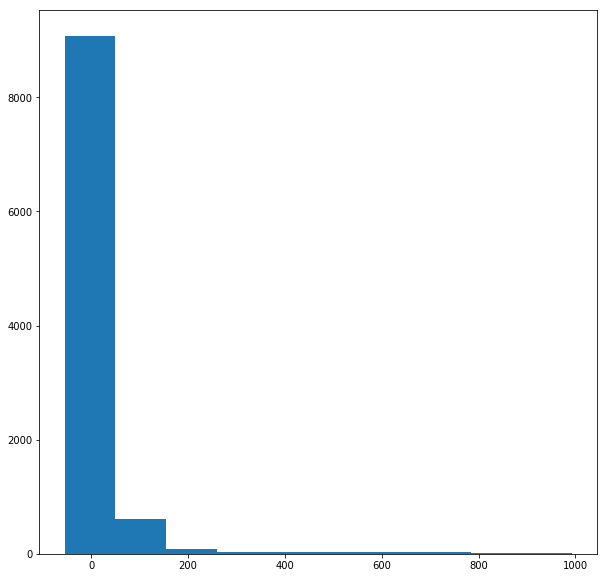

In [391]:
plotdata = (data['request_ts']-data['trans_ts'])
display(plotdata.shape)
plotdata = pd.DataFrame(data=plotdata,columns=['dif'])
plotdata=plotdata.loc[plotdata['dif'] <1000]
display(plotdata.shape)
fig, axs = plt.subplots(figsize=(10, 10))
axs.hist(plotdata['dif'])
#data=data.loc[(data['request_ts']-data['trans_ts'])>= 0]
#axs.hist(plotdata['trans_ts'])
#axs.scatter(plotdata['request_ts'], plotdata['trans_ts'])

print (data.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

0.41590118408203125

0.21383285522460938

0.3424026561737061

0.3495340347290057

0.9700813293457031

0.9232711791992188

0.9350986698150635

0.9339904785156179

0.9571762084961009

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


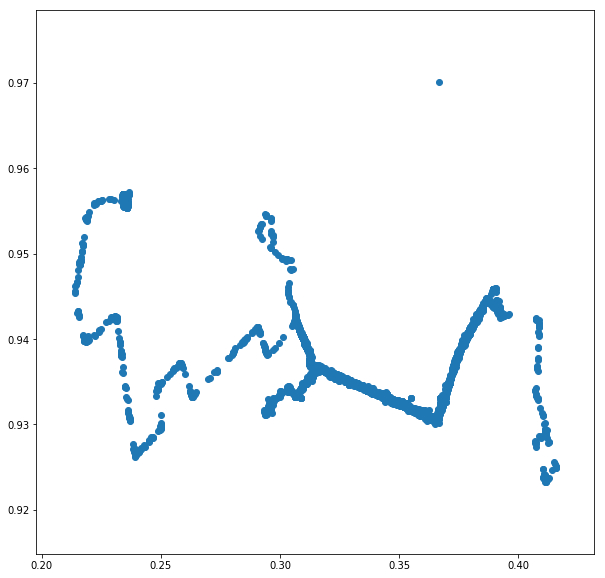

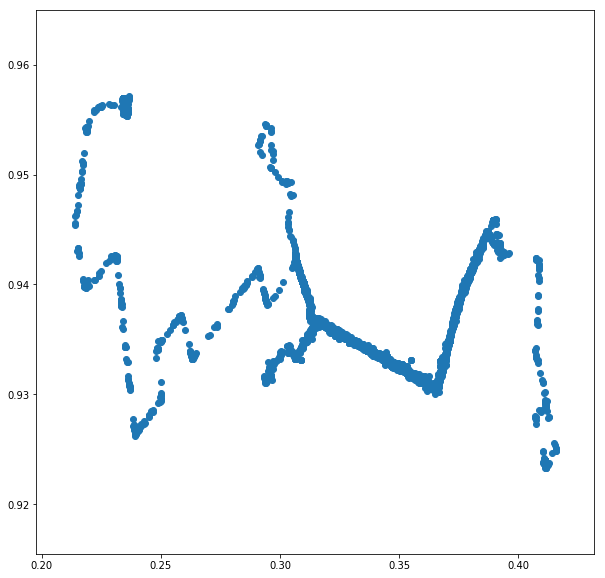

In [392]:
maxxx=data['lat'].max()
display(data['log'].max())
display(data['log'].min())
display(data['log'].mean())
display(data['log'].median())
display(data['lat'].max())
display(data['lat'].min())
display(data['lat'].mean())
display(data['lat'].median())
plotdata = data[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

data=data.loc[data['lat'] != maxxx]
display(data['lat'].max())
plotdata = data[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

print (data.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


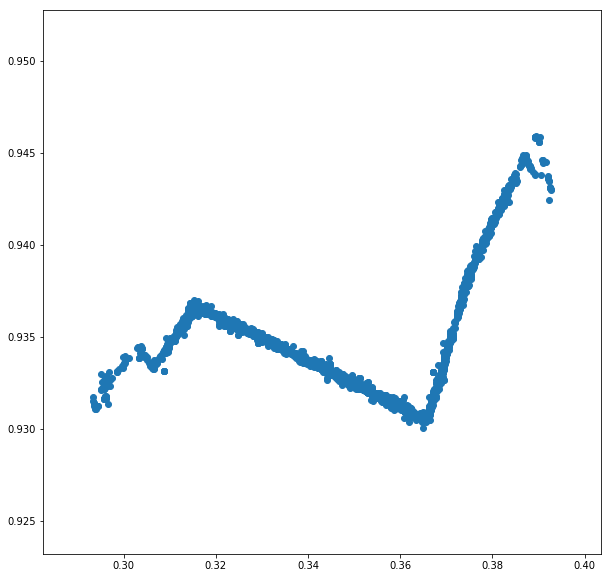

In [393]:
test=data.loc[data['label'] == '0']
plotdata = test[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

print (data.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


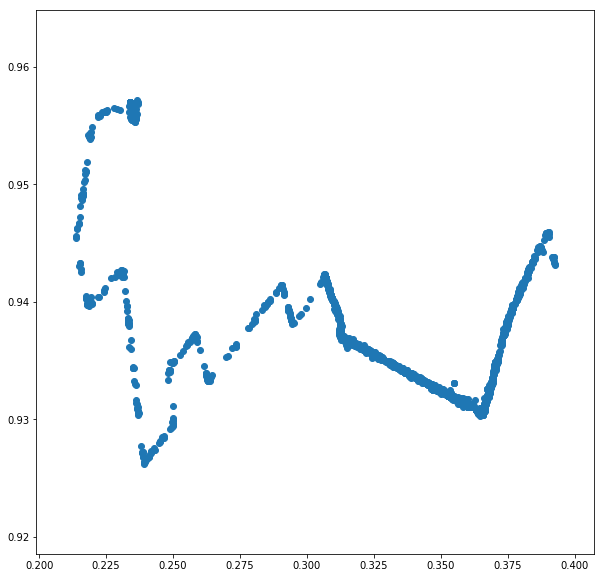

In [395]:
test1=data.loc[data['label'] == '1']
plotdata = test1[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

print (data.tail(5))

print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


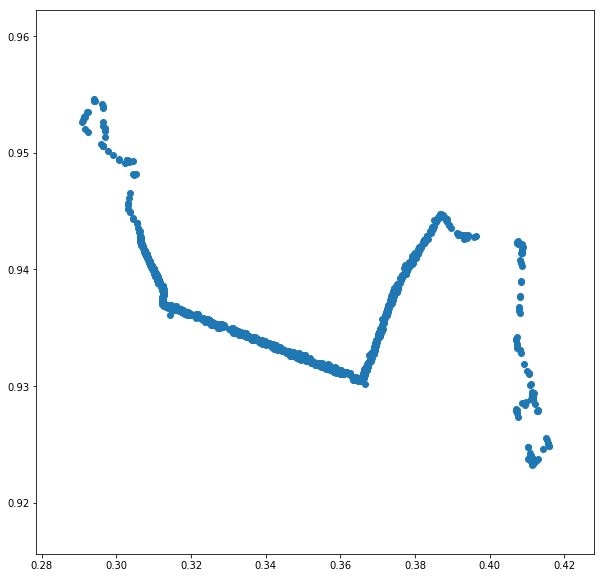

In [396]:
test2=data.loc[data['label'] == '2']
plotdata = test2[['log','lat']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])

print (data.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

In [397]:
questions=data_upload[data_upload.label=='?']
questions=questions.drop(['label'],axis=1)
print (questions.head(5))
print (len(questions))

print (data.tail(5))
#print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

         log       lat  request_ts    trans_ts
11  0.359190  0.931217  1511956827  1511956787
18  0.355488  0.931679  1511956827  1511956811
41  0.312258  0.937222  1511956918  1511956905
42  0.367332  0.931988  1511956918  1511956907
56  0.329239  0.934929  1511956978  1511956967
5000
            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0


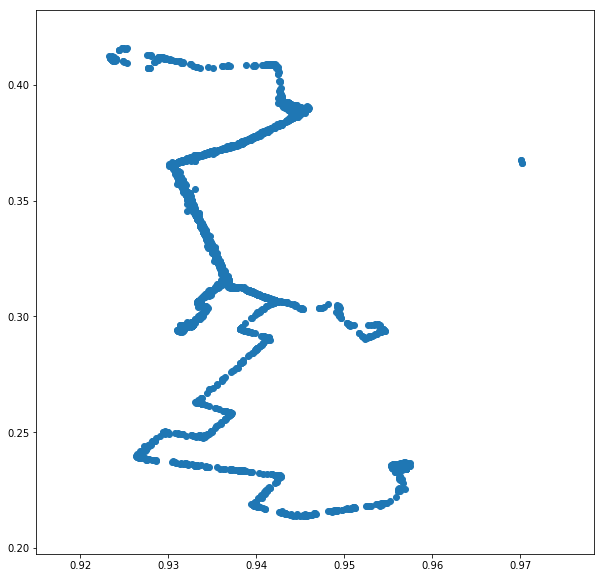

In [398]:
plotdata = questions[['lat','log']]
fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['lat'], plotdata['log'])


In [351]:
from math import sqrt
def guess_ques(ques,data):
    res=list()
    num=list()
    l=0
    for index, i in ques.iterrows():
        res.append(9223775807)
        num.append(-1)
        i1=i[1]
        i0=i[0]
        for indexs, j in data.iterrows():
            j1=j[1]
            j2=j[2]
            j0=j[0]
            if(index!=indexs):
                dis=sqrt((i0-j0)*(i0-j0)+(i1-j1)*(i1-j1))
                last=res.pop()
                last_num=num.pop()
                if dis<last:
                    res.append(dis)
                    num.append(j2)
                else:
                    res.append(last)
                    num.append(last_num)
                if(dis==0):
                    break
        l+=1
        if(l%100==0):
            display(l)
            display(num[l-10:l])
            display(res[l-10:l])
    print(num)
    df=pd.DataFrame(data=num,columns=['guess'])
    return df
questions['guess']=guess_ques(questions[['log','lat']],data[['log','lat','label']])
print(questions.shape)
print(questions['guess'])

KeyboardInterrupt: 

In [399]:
prev=['0', '2', '1', '0', '0', '0', '1', '0', '1', '2', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '2', '1', '0', '1', '2', '1', '2', '1', '1', '2', '1', '2', '0', '2', '2', '0', '2', '2', '1', '2', '2', '1', '0', '2', '2', '1', '2', '0', '1', '2', '0', '2', '0', '1', '2', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '2', '0', '0', '0', '1', '0', '0', '0', '2', '0', '2', '1', '2', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '2', '1', '2', '0', '1', '1', '1', '0', '0', '2', '0', '2', '1', '0', '0', '0', '0', '0', '0', '0', '1', '2', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '2', '1', '0', '2', '1', '1', '0', '0', '2', '0', '0', '2', '0', '0', '2', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '2', '0', '0', '2', '2', '1', '0', '1', '1', '0', '0', '2', '1', '2', '1', '1', '1', '0', '2', '2', '0', '0', '1', '1', '0', '1', '2', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '2', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '2', '1', '2', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '2', '0', '0', '0', '2', '0', '1', '1', '1', '0', '1', '2', '2', '0', '2', '0', '0', '2', '0', '1', '0', '1', '2', '1', '1', '0', '2', '2', '0', '0', '1', '2', '2', '0', '1', '0', '1', '1', '2', '1', '1', '1', '0', '1', '1', '1', '2', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '2', '0', '1', '1', '1', '0', '2', '2', '2', '1', '0', '1', '1', '1', '1', '2', '0', '2', '1', '1', '1', '1', '0', '1', '2', '0', '2', '0', '0', '1', '2', '0', '0', '1', '2', '2', '2', '1', '0', '0', '0', '0', '0', '0', '0', '1', '2', '0', '2', '1', '2', '1', '1', '1', '0', '1', '0', '2', '0', '1', '0', '2', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '2', '1', '2', '0', '1', '1', '2', '1', '0', '1', '1', '0', '0', '0', '1', '2', '2', '1', '0', '2', '0', '1', '1', '0', '2', '1', '0', '2', '1', '0', '1', '2', '1', '2', '0', '1', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '1', '2', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '2', '0', '0', '1', '1', '2', '2', '1', '1', '2', '1', '1', '0', '1', '1', '0', '0', '1', '2', '1', '1', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '2', '0', '1', '2', '0', '2', '0', '0', '1', '2', '1', '1', '1', '0', '0', '2', '1', '0', '1', '1', '1', '0', '0', '0', '2', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '2', '2', '1', '2', '0', '1', '2', '1', '2', '0', '1', '1', '0', '2', '0', '2', '1', '0', '1', '1', '2', '1', '1', '2', '2', '1', '2', '2', '1', '0', '1', '0', '0', '0', '0', '2', '0', '0', '0', '0', '1', '0', '2', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '2', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '2', '1', '0', '1', '0', '1', '0', '1', '1', '0', '2', '2', '0', '0', '0', '0', '0', '1', '1', '2', '0', '0', '1', '0', '1', '2', '1', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '2', '0', '2', '2', '0', '0', '0', '0', '1', '0', '2', '0', '1', '2', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '2', '2', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '2', '2', '0', '2', '0', '2', '2', '2', '0', '0', '2', '0', '2', '0', '2', '1', '2', '2', '2', '1', '2', '1', '1', '2', '0', '0', '1', '0', '0', '1', '1', '2', '0', '0', '1', '1', '0', '1', '2', '1', '0', '2', '2', '0', '1', '0', '2', '2', '1', '0', '0', '0', '0', '0', '0', '0', '0', '2', '1', '0', '0', '0', '0', '0', '2', '2', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '2', '0', '0', '0', '2', '0', '0', '1', '0', '0', '2', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '2', '1', '0', '2', '1', '1', '1', '0', '2', '1', '2', '0', '0', '0', '1', '1', '0', '2', '1', '0', '1', '0', '1', '0', '2', '1', '0', '1', '1', '0', '2', '0', '0', '1', '0', '2', '2', '2', '0', '1', '0', '1', '0', '0', '1', '1', '2', '1', '1', '1', '1', '2', '0', '0', '1', '1', '1', '1', '0', '0', '2', '1', '1', '2', '1', '2', '0', '2', '1', '1', '0', '1', '1', '0', '0', '2', '2', '1', '0', '2', '2', '0', '0', '1', '0', '0', '1', '1', '1', '1', '2', '0', '0', '2', '2', '2', '1', '1', '1', '0', '1', '2', '1', '2', '0', '1', '1', '0', '2', '1', '1', '1', '2', '2', '1', '1', '0', '0', '0', '0', '2', '1', '1', '0', '1', '2', '0', '2', '0', '2', '1', '1', '1', '1', '2', '2', '0', '0', '2', '0', '2', '0', '2', '0', '2', '1', '0', '0', '0', '2', '0', '2', '0', '0', '1', '2', '1', '1', '1', '2', '0', '2', '0', '2', '0', '0', '0', '2', '2', '0', '0', '1', '1', '2', '1', '0', '1', '1', '1', '0', '0', '1', '2', '1', '1', '0', '1', '0', '1', '0', '0', '1', '2', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '2', '0', '1', '1', '2', '1', '2', '0', '2', '1', '0', '2', '2', '0', '2', '1', '2', '0', '0', '0', '2', '0', '0', '0', '0', '1', '2', '0', '1', '1', '0', '1', '1', '0', '2', '0', '0', '0', '2', '1', '0', '1', '1', '1', '1', '0', '1', '2', '2', '0', '1', '1', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '0', '1', '0', '0', '0', '0', '2', '0', '2', '1', '1', '0', '1', '1', '0', '2', '0', '1', '2', '2', '0', '1', '1', '1', '2', '2', '1', '0', '1', '2', '0', '1', '2', '2', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '2', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '2', '0', '0', '0', '1', '0', '0', '2', '2', '0', '0', '0', '0', '2', '1', '2', '2', '1', '0', '2', '1', '0', '1', '2', '1', '2', '2', '2', '1', '2', '1', '1', '0', '0', '2', '1', '0', '2', '1', '1', '2', '2', '0', '2', '2', '1', '0', '1', '0', '2', '1', '2', '1', '0', '2', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '2', '0', '2', '2', '1', '1', '0', '2', '0', '2', '2', '2', '0', '1', '1', '2', '2', '0', '1', '0', '0', '2', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '2', '2', '0', '1', '2', '1', '2', '0', '0', '1', '2', '1', '1', '1', '1', '2', '0', '1', '1', '2', '0', '2', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '2', '1', '1', '0', '2', '1', '2', '0', '1', '1', '1', '0', '2', '2', '0', '0', '0', '2', '2', '1', '1', '2', '2', '0', '1', '2', '1', '1', '1', '2', '2', '0', '0', '2', '0', '1', '0', '2', '1', '1', '1', '2', '0', '0', '1', '0', '2', '1', '1', '1', '2', '0', '2', '0', '1', '2', '1', '0', '1', '2', '1', '0', '1', '1', '0', '0', '1', '1', '2', '0', '1', '0', '1', '1', '1', '0', '0', '2', '1', '2', '0', '2', '2', '1', '1', '1', '1', '1', '0', '2', '1', '2', '0', '1', '1', '0', '1', '2', '0', '1', '1', '2', '0', '0', '2', '0', '1', '2', '1', '1', '2', '2', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '2', '2', '2', '2', '0', '2', '1', '1', '1', '0', '2', '2', '1', '2', '1', '1', '2', '0', '0', '2', '0', '1', '2', '1', '1', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '0', '0', '1', '1', '2', '1', '1', '1', '2', '0', '0', '1', '1', '2', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '2', '1', '2', '1', '0', '2', '0', '1', '0', '1', '2', '2', '2', '0', '0', '2', '0', '2', '0', '1', '1', '0', '2', '1', '1', '0', '0', '2', '0', '2', '1', '0', '1', '0', '2', '1', '1', '1', '0', '0', '0', '0', '1', '2', '2', '0', '1', '1', '0', '0', '2', '2', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '2', '0', '0', '1', '1', '2', '0', '1', '1', '2', '2', '0', '2', '2', '0', '1', '2', '0', '2', '2', '0', '2', '2', '1', '1', '1', '2', '0', '0', '2', '1', '2', '2', '0', '1', '1', '1', '0', '2', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '2', '2', '1', '2', '0', '2', '2', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '2', '1', '0', '0', '0', '1', '0', '1', '2', '2', '0', '0', '1', '0', '0', '2', '0', '2', '0', '0', '0', '0', '1', '0', '0', '0', '0', '2', '0', '1', '1', '1', '1', '1', '2', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '2', '0', '1', '0', '2', '0', '1', '0', '0', '0', '0', '0', '2', '0', '0', '2', '2', '2', '0', '2', '0', '1', '1', '2', '0', '0', '1', '1', '0', '2', '1', '2', '0', '0', '0', '1', '1', '2', '1', '1', '2', '1', '1', '1', '0', '2', '0', '1', '1', '2', '2', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '2', '1', '1', '0', '1', '1', '2', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '2', '0', '2', '0', '0', '1', '1', '2', '0', '2', '0', '1', '0', '1', '2', '1', '2', '1', '1', '1', '1', '2', '0', '1', '1', '2', '2', '1', '1', '2', '1', '1', '1', '0', '0', '1', '0', '0', '1', '2', '1', '1', '1', '2', '0', '0', '1', '2', '2', '0', '1', '0', '0', '2', '0', '2', '0', '0', '0', '2', '2', '2', '1', '1', '2', '0', '1', '2', '1', '1', '2', '0', '0', '1', '0', '1', '0', '1', '0', '2', '1', '2', '0', '1', '0', '0', '2', '1', '0', '0', '0', '1', '0', '2', '2', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '2', '0', '0', '2', '1', '1', '0', '1', '1', '2', '0', '1', '1', '1', '1', '1', '1', '0', '2', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '2', '2', '0', '1', '2', '0', '0', '0', '2', '1', '2', '1', '1', '0', '1', '1', '0', '2', '1', '0', '2', '0', '0', '0', '1', '2', '1', '1', '1', '0', '1', '0', '0', '2', '0', '0', '2', '2', '1', '0', '2', '1', '0', '0', '0', '2', '2', '1', '2', '1', '0', '1', '2', '1', '2', '0', '1', '0', '0', '2', '2', '2', '2', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '2', '0', '1', '2', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '2', '2', '0', '1', '1', '1', '1', '0', '2', '2', '2', '1', '1', '0', '1', '1', '0', '2', '0', '2', '0', '1', '2', '0', '1', '1', '0', '2', '0', '2', '1', '2', '2', '1', '2', '1', '0', '0', '1', '0', '1', '1', '2', '0', '0', '0', '0', '1', '2',
      '2', '0', '2', '0', '1', '2', '2', '1', '1', '0', '1', '2', '2', '2', '0', '0', '0', '1', '0', '1', '0', '0', '0', '2', '0', '2', '2', '0', '1', '0', '0', '2', '1', '1', '2', '1', '2', '1', '0', '0', '0', '1', '2', '0', '0', '0', '2', '2', '1', '2', '1', '0', '1', '2', '2', '0', '2', '2', '2', '2', '0', '0', '2', '1', '2', '0', '0', '0', '1', '2', '2', '1', '0', '1', '0', '0', '1', '2', '1', '0', '1', '1', '1', '2', '0', '0', '0', '1', '1', '0', '1', '0', '1', '2', '1', '2', '2', '2', '2', '0', '2', '2', '1', '0', '1', '1', '1', '0', '2', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '2', '0', '1', '0', '2', '1', '2', '1', '1', '1', '2', '0', '1', '1', '1', '1', '2', '1', '2', '2', '0', '1', '1', '0', '2', '1', '1', '2', '1', '0', '1', '2', '2', '0', '0', '2', '1', '0', '2', '1', '2', '2', '0', '1', '0', '1', '1', '1', '0', '2', '0', '0', '0', '2', '2', '1', '1', '2', '1', '0', '0', '2', '2', '1', '0', '1', '2', '1', '0', '1', '0', '0', '1', '2', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '2', '1', '0', '0', '0', '2', '0', '2', '2', '0', '1', '1', '0', '1', '1', '2', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '2', '2', '0', '1', '2', '0', '2', '1', '2', '1', '0', '2', '2', '1', '2', '1', '1', '1', '1', '1', '0', '2', '2', '0', '0', '2', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '2', '2', '2', '0', '1', '1', '2', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '2', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '2', '1', '2', '1', '2', '2', '2', '1', '0', '0', '0', '0', '2', '1', '1', '2', '0', '0', '1', '2', '0', '2', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '2', '2', '0', '2', '1', '1', '1', '2', '1', '0', '2', '0', '1', '1', '1', '1', '2', '2', '1', '1', '1', '0', '2', '1', '2', '1', '0', '1', '1', '2', '0', '0', '0', '2', '2', '2', '1', '1', '0', '2', '1', '2', '2', '2', '0', '0', '2', '0', '1', '1', '0', '2', '2', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '2', '0', '2', '0', '2', '1', '0', '1', '1', '1', '1', '2', '0', '0', '1', '1', '2', '0', '0', '0', '0', '1', '2', '0', '0', '1', '2', '1', '0', '0', '0', '1', '1', '1', '2', '1', '1', '2', '1', '2', '1', '2', '1', '0', '2', '0', '1', '1', '2', '0', '0', '2', '0', '1', '1', '1', '0', '1', '1', '0', '2', '1', '2', '0', '2', '0', '0', '1', '0', '2', '1', '0', '2', '1', '0', '1', '2', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '2', '2', '0', '1', '2', '1', '0', '0', '2', '2', '0', '0', '1', '1', '1', '1', '0', '2', '1', '1', '2', '2', '2', '0', '1', '2', '1', '0', '1', '1', '1', '1', '0', '2', '2', '1', '2', '1', '1', '1', '1', '1', '2', '0', '2', '0', '1', '1', '0', '2', '1', '1', '2', '2', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '2', '1', '2', '2', '0', '2', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '2', '2', '1', '1', '1', '2', '0', '0', '1', '0', '2', '1', '1', '2', '0', '2', '2', '0', '1', '2', '1', '2', '0', '1', '1', '0', '0', '0', '0', '1', '2', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '2', '0', '2', '0', '1', '0', '1', '0', '2', '1', '1', '1', '1', '2', '2', '0', '0', '0', '1', '1', '0', '0', '0', '2', '1', '2', '2', '0', '1', '0', '2', '2', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '2', '0', '2', '1', '2', '0', '1', '2', '1', '2', '1', '1', '0', '2', '2', '1', '1', '0', '0', '1', '0', '1', '2', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '2', '0', '1', '1', '0', '2', '1', '1', '2', '2', '0', '1', '1', '1', '0', '1', '2', '1', '2', '1', '2', '1', '1', '2', '0', '0', '2', '1', '0', '0', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '0', '1', '0', '0', '2', '0', '0', '0', '1', '1', '2', '1', '1', '1', '2', '2', '2', '0', '1', '1', '1', '1', '0', '0', '0', '2', '1', '1', '1', '0', '2', '0', '0', '0', '1', '0', '2', '1', '1', '1', '1', '1', '0', '2', '0', '0', '1', '1', '1', '0', '0', '0', '1', '2', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '2', '0', '1', '2', '0', '1', '0', '0', '0', '2', '0', '1', '2', '0', '2', '2', '0', '2', '0', '1', '2', '2', '1', '2', '0', '0', '2', '2', '1', '1', '0', '1', '0', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '0', '1', '0', '1', '2', '0', '1', '2', '2', '0', '0', '1', '1', '0', '1', '1', '0', '2', '0', '1', '0', '1', '1', '0', '1', '1', '2', '1', '1', '0', '1', '2', '2', '0', '1', '1', '1', '0', '0', '0', '0', '2', '2', '0', '1', '2', '0', '2', '2', '0', '0', '1', '1', '0', '2', '0', '1', '1', '1', '2', '0', '2', '0', '1', '0', '2', '0', '1', '0', '0', '1', '1', '2', '1', '0', '2', '0', '0', '0', '2', '1', '1', '1', '1', '0', '1', '0', '0', '2', '2', '1', '2', '2', '1', '0', '0', '2', '0', '0', '0', '0', '2', '0', '1', '0', '0', '1', '1', '2', '1', '2', '0', '1', '1', '1', '2', '2', '1', '2', '2', '1', '0', '0', '1', '2', '2', '0', '0', '2', '2', '0', '2', '1', '1', '1', '2', '0', '1', '0', '1', '1', '0', '1', '0', '2', '1', '0', '2', '2', '2', '1', '1', '0', '0', '0', '1', '1', '0', '0', '2', '2', '2', '0', '1', '0', '2', '0', '1', '0', '1', '1', '1', '1', '1', '1', '2', '1', '1', '0', '1', '0', '1', '1', '0', '2', '0', '1', '0', '2', '0', '0', '2', '0', '1', '1', '1', '2', '1', '1', '2', '1', '2', '2', '0', '1', '0', '2', '2', '0', '2', '0', '1', '0', '0', '2', '0', '2', '1', '0', '1', '0', '1', '2', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '2', '0', '1', '1', '1', '1', '1', '1', '0', '0', '2', '1', '1', '1', '1', '0', '1', '1', '2', '2', '2', '1', '0', '1', '0', '1', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '2', '1', '1', '1', '0', '1', '1', '2', '0', '1', '0', '0', '0', '2', '2', '0', '2', '0', '0', '1', '1', '2', '0', '1', '0', '2', '0', '0', '0', '2', '1', '1', '2', '1', '2', '0', '0', '2', '1', '0', '2', '1', '0', '1', '1', '1', '1', '1', '1', '0', '2', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '2', '0', '0', '1', '1', '0', '0', '0', '2', '2', '0', '1', '1', '2', '1', '1', '1', '0', '0', '1', '0', '2', '0', '0', '1', '1', '0', '2', '1', '1', '1', '0', '0', '0', '1', '2', '0', '2', '0', '1', '1', '0', '2', '2', '2', '0', '1', '0', '2', '2', '1', '2', '0', '1', '1', '0', '1', '0', '2', '0', '0', '2', '0', '2', '1', '1', '1', '1', '2', '0', '1', '0', '2', '2', '0', '2', '0', '0', '0', '2', '0', '1', '0', '0', '2', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '2', '2', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '2', '0', '2', '2', '2', '1', '2', '1', '0', '1', '0', '0', '0', '2', '1', '1', '1', '0', '1', '0', '1', '0', '1', '2', '2', '1', '0', '2', '0', '2', '1', '0', '2', '2', '2', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '2', '0', '2', '1', '1', '1', '0', '2', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '2', '2', '0', '1', '1', '0', '0', '2', '0', '2', '1', '1', '0', '2', '1', '0', '2', '1', '2', '1', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '2', '0', '1', '2', '1', '1', '1', '1', '0', '2', '2', '1', '0', '2', '0', '0', '1', '0', '1', '1', '0', '1', '2', '0', '2', '2', '1', '0', '2', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '2', '1', '0', '1', '1', '2', '1', '2', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '2', '1', '2', '1', '0', '1', '0', '1', '0', '1', '2', '1', '0', '1', '2', '1', '2', '1', '0', '0', '0', '0', '1', '1', '1', '0', '2', '0', '2', '2', '1', '2', '0', '1', '1', '0', '0', '0', '1', '0', '2', '1', '1', '1', '2', '1', '1', '0', '1', '1', '0', '1', '0', '2', '1', '1', '2', '1', '0', '1', '2', '2', '0', '0', '0', '0', '1', '2', '2', '0', '0', '0', '1', '0', '1', '0', '0', '1', '2', '1', '2', '1', '2', '1', '0', '1', '1', '1', '1', '2', '0', '1', '0', '1', '2', '0', '1', '2', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '2', '0', '0', '1', '2', '0', '1', '0', '0', '2', '0', '1', '0', '0', '0', '1', '2', '1', '0', '1', '1', '1', '1', '1', '0', '0', '2', '0', '0', '1', '2', '1', '1', '1', '2', '0', '2', '1', '1', '1', '0', '2', '1', '0', '1', '0', '1', '1', '1', '2', '0', '0', '2', '1', '0', '0', '1', '1', '1', '1', '2', '1', '2', '0', '2', '2', '0', '1', '0', '1', '2', '1', '1', '1', '1', '2', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '2', '1', '2', '2', '0', '1', '0', '1', '0', '1', '2', '0', '1', '1', '1', '2', '1', '2', '1', '0', '0', '1', '1', '0', '1', '2', '1', '1', '1', '0', '0', '0', '2', '2', '0', '1', '2', '1', '0', '1', '1', '2', '0', '1', '1', '1', '0', '2', '1', '2', '1', '0', '2', '1', '0', '1', '0', '0', '1', '0', '1', '2', '1', '0', '0', '0', '0', '0', '1', '0', '0', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '0', '1', '0', '1', '0', '1', '1', '2', '1', '1', '1', '0', '1', '1', '2', '2', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '2', '2', '1', '0', '1', '0', '2', '0', '2', '2', '2', '1', '0', '0', '1', '1', '1', '1', '2', '0', '0', '1', '0', '0', '1', '1', '0', '1', '2', '1', '0', '0', '2', '1', '1', '0', '2', '0', '2', '1', '1', '1', '0', '1', '2', '2', '2', '1', '2', '1', '1', '2', '0', '1', '0', '1', '1', '2', '1', '1', '1', '0', '1', '0', '0', '2', '1', '1', '2', '1', '0', '1', '1', '1', '0', '1', '0', '1', '2', '1', '1', '0', '0', '1', '1', '1', '2', '1', '1', '0', '0', '1', '1', '1', '2', '0', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1', '0', '2', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '2', '1', '2', '0', '1', '1', '1', '1', '1', '0', '0', '1', '2', '2', '0', '1', '1', '0', '0', '2', '1', '2', '1', '0', '2', '1', '1', '0', '0', '2', '0', '0', '0', '1', '0', '0', '1', '1', '2', '1', '1', '0', '0', '0', '2', '1', '1', '2', '0', '1', '1', '1', '1', '1', '2', '1', '1',
      '1', '2', '0', '0', '1', '0', '1', '2', '1', '2', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '2', '2', '1', '2', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '2', '2', '1', '0', '1', '1', '1', '2', '1', '1', '0', '1', '0', '2', '2', '2', '0', '0', '0', '0', '2', '0', '2', '1', '1', '1', '1', '2', '2', '0', '0', '2', '0', '0', '2', '1', '1', '2', '1', '1', '0', '1', '2', '1', '2', '1', '2', '1', '0', '1', '2', '0', '1', '2', '0', '1', '1', '1', '0', '0', '2', '0', '0', '1', '1', '0', '2', '1', '2', '0', '0', '0', '1', '0', '0', '0', '2', '0', '0', '0', '0', '1', '0', '0', '1', '1', '2', '0', '2', '1', '0', '0', '0', '1', '0', '1', '2', '1', '1', '1', '0', '0', '1', '1', '1', '0', '2', '0', '0', '2', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '2', '1', '0', '2', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '2', '2', '0', '1', '2', '0', '2', '0', '1', '1', '0', '0', '1', '2', '2', '1', '1', '0', '1', '0', '0', '1', '2', '2', '1', '0', '1', '2', '0', '2', '0', '2', '1', '2', '2', '1', '1', '1', '2', '2', '1', '1', '1', '0', '1', '2', '1', '1', '0', '0', '2', '0', '1', '2', '0', '0', '2', '0', '0', '0', '2', '2', '2', '0', '1', '1', '1', '2', '2', '0', '1', '1', '0', '0', '2', '0', '0', '2', '0', '0', '0', '1', '0', '2', '1', '0', '2', '1', '1', '2', '1', '2', '0', '1', '0', '0', '2', '0', '1', '0', '0', '0', '2', '1', '0', '1', '2', '0', '1', '0', '0', '2', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '2', '0', '0', '1', '1', '2', '0', '1', '0', '0', '0', '0', '2', '0', '0', '1', '1', '0', '2', '0', '1', '2', '0', '1', '1', '1', '2', '2', '0', '1', '1', '1', '0', '0', '0', '2', '1', '2', '2', '1', '0', '1', '0', '1', '0', '2', '0', '1', '2', '1', '1', '1', '0', '2', '2', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '2', '2', '1', '1', '0', '1', '0', '0', '2', '1', '1', '0', '1', '1', '0', '0', '1', '2', '1', '1', '0', '2', '0', '2', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '1', '2', '0', '0', '0', '1', '2', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '2', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '1', '1', '1', '1', '0', '0', '2', '2', '1', '0', '1', '2', '2', '1', '1', '0', '2', '2', '1', '0', '0', '1', '0', '2', '0', '1', '2', '1', '2', '1', '0', '0', '2', '2', '2', '1', '2', '1', '1', '1', '2', '2', '1', '1', '2', '1', '2', '2', '0', '2', '1', '1', '1', '2', '1', '0', '0', '0', '2', '1', '0', '2', '1', '2', '1', '1', '1', '1', '0', '1', '2', '0', '2', '1', '1', '1', '1', '2', '2', '0', '0', '1', '2', '0', '1', '2', '1', '2', '2', '0', '1', '0', '2', '2', '1', '1', '1', '1', '0', '2', '0', '0', '0', '1', '2', '1', '1', '0', '0', '0', '0', '1', '2', '0', '1', '0', '0', '2', '0', '2', '1', '1', '0', '0', '2', '1', '0', '0', '1', '1', '1', '2', '2', '1', '0', '0', '2', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '2', '0', '2', '0', '1', '0', '1', '0', '0', '2', '0', '0', '1', '0', '0', '0', '0', '1', '2', '2', '2', '0', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '0', '2', '1', '1', '1', '2', '1', '2', '2', '0', '2', '0', '0', '0', '1', '0', '1', '0', '0', '2', '2', '0', '1', '2', '2', '0', '0', '1', '1', '1', '0', '1', '0', '1', '2', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '2', '1', '1', '1', '1', '2', '0', '1', '1', '1', '2', '1', '0', '0', '1', '1', '2', '1', '2', '1', '1', '2', '0', '0', '0', '2', '1', '0', '2', '0', '1', '1', '0', '1', '0', '0', '2', '1', '1', '0', '1', '0', '2', '1', '2', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '2', '1', '2', '1', '2', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '2', '1', '0', '2', '1', '1', '2', '0', '1', '1', '1', '0', '1', '2', '1', '2', '1', '0', '1', '1', '2', '1', '1', '0', '1', '1', '1', '0', '2', '0', '0', '0', '2', '2', '1', '1', '1', '2', '0', '1', '2', '1', '2', '2', '1', '1', '0', '1', '2', '0', '1', '0', '2', '1', '1', '0', '2', '1', '1', '0', '1', '1', '1', '1', '2', '1', '2', '2', '0', '1', '1', '0', '2', '0', '1', '1', '2', '0', '1', '2', '0', '1', '1', '0', '0', '0', '2', '2', '1', '1', '0', '2', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '2', '1', '0', '1', '0', '1', '2', '2', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '2', '1', '0', '1', '0', '0', '1', '2', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '2', '1', '2', '2', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '2', '2', '2', '0', '1', '2', '1', '0', '1', '1', '1', '2', '0', '1', '2', '1', '0', '2', '1', '0', '1', '0', '2', '0', '1', '1', '2', '1', '1']

print (data.tail(5))
print (questions.head(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
         log       lat  request_ts    trans_ts
11  0.359190  0.931217  1511956827  1511956787
18  0.355488  0.931679  1511956827  1511956811
41  0.312258  0.937222  1511956918  1511956905
42  0.367332  0.931988  1511956918  1511956907
56  0.329239  0.934929  1511956978  1511956967
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


In [400]:
questions['guess']=prev
display((questions['request_ts']-questions['trans_ts']).max())
display((questions['request_ts']-questions['trans_ts']).min())
display((questions['request_ts']-questions['trans_ts']).mean())
display((questions['request_ts']-questions['trans_ts']).median())
plotdata = (questions['request_ts']-questions['trans_ts'])
plotdata = pd.DataFrame(data=plotdata,columns=['dif'])
display(plotdata.shape)
plotdata=plotdata.loc[plotdata['dif']<0]
display(plotdata.shape)
#fig, axs = plt.subplots(figsize=(10, 10))
#axs.hist(plotdata['dif'])
print (len(questions))
print (data.tail(5))
print (questions.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

1237

0

44.4552

17.0

(5000, 1)

(0, 1)

5000
            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  1512302365  1512302360     1
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


0.4159889221191406

0.4159889221191406

0.21363449096680043

0.3275340156555176

0.33731746673583984

0.9701843261718821

0.9233016967773438

0.9370807746887208

0.9346332550048828

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  1512302365  1512302360     1
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


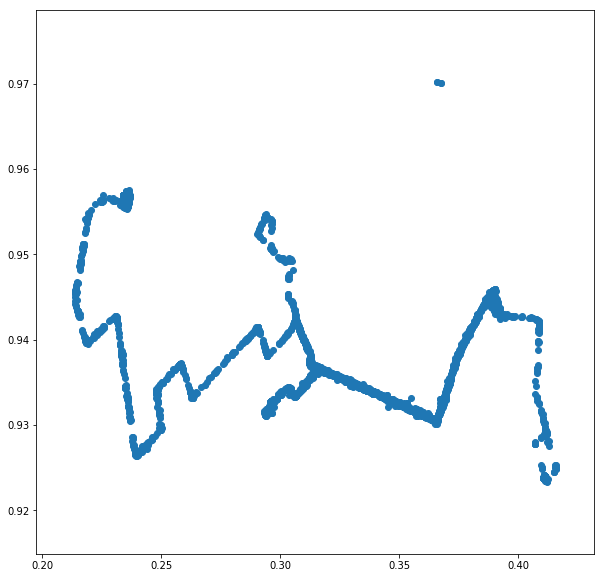

In [401]:
maxxx=questions['lat'].max()
display(questions['log'].max())
#questions=questions.loc[questions['lat'] < 0.96]
plotdata = questions[['log','lat']]
display(questions['log'].max())
display(questions['log'].min())
display(questions['log'].mean())
display(questions['log'].median())
display(questions['lat'].max())
display(questions['lat'].min())
display(questions['lat'].mean())
display(questions['lat'].median())

fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])
print (data.tail(5))
print (questions.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

In [402]:
bad_data=data_upload[data_upload.label=='-']

print (bad_data.head(5))
print (len(bad_data))
print (data.tail(5))
print (questions.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

        log       lat  request_ts    trans_ts label
1  0.219528  0.954617  1511956827  1511956746     -
2  0.409101  0.931679  1511956827  1511956747     -
3  0.293602  0.938892  1511956827  1511956759     -
4  0.360102  0.931103  1511956827  1511956767     -
5  0.309683  0.940006  1511956827  1511956769     -
43665
            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  151

0.41661643981933594

0.21335411071776988

0.31777552053525143

0.3131980895996094

0.9701919555664062

0.9224357604980469

0.938349797834062

0.9358100891113281

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  1512302365  1512302360     1
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


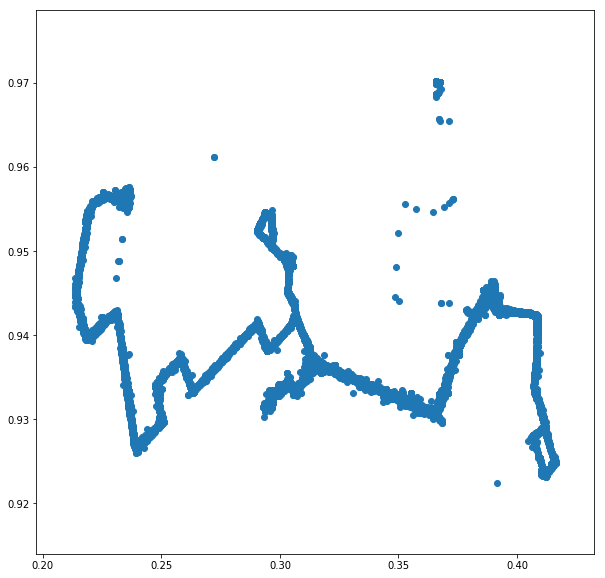

In [403]:
plotdata = bad_data[['log','lat']]
display(bad_data['log'].max())
display(bad_data['log'].min())
display(bad_data['log'].mean())
display(bad_data['log'].median())
display(bad_data['lat'].max())
display(bad_data['lat'].min())
display(bad_data['lat'].mean())
display(bad_data['lat'].median())

fig, axs = plt.subplots( figsize=(10, 10))
axs.scatter(plotdata['log'], plotdata['lat'])
print (data.tail(5))
print (questions.tail(5))
print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])

In [404]:
somemore=pd.merge(data, bad_data, on=['log', 'lat'], how='inner')
display(len(somemore))
display(somemore.tail())
print (data.tail(5))
print (questions.tail(5))
print (somemore.tail(5))
print(somemore[(somemore.guess!='2') & (somemore.guess!='1') & (somemore.guess!='0')])

58439

log       lat  request_ts_x  trans_ts_x label_x guess  \
58434  0.23476  0.955654    1512302064  1512302030       1     1   
58435  0.23476  0.955654    1512302064  1512302030       1     1   
58436  0.23476  0.955654    1512302064  1512302030       1     1   
58437  0.23476  0.955654    1512302064  1512302030       1     1   
58438  0.23476  0.955654    1512302064  1512302030       1     1   

       request_ts_y  trans_ts_y label_y  
58434    1512301581  1512301545       -  
58435    1512301702  1512301685       -  
58436    1512301822  1512301790       -  
58437    1512301943  1512301930       -  
58438    1512302305  1512302270       -

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  1512302365  1512302360     1
           log       lat  request_ts_x  trans_ts_x label_x guess  \
58434  0.23476  0.955654    1512302064  1512302030       1     1   
58435  0.23476  0.955654    1512302064  1512302030       1     1   
58436  0.23476  0.955654    1512302064  1512302030       1     1   
58437  0.23476  0.95

In [405]:
samepos_data=somemore[['log','lat','request_ts_y','trans_ts_y','label_x','guess']]

samepos_data=samepos_data.rename(index=str, columns={'request_ts_y': 'request_ts',
                                                     'trans_ts_y': 'trans_ts','label_x': 'label'})
print (data.tail(5))
print (samepos_data.tail(5))
print(samepos_data[(samepos_data.guess!='2') & (samepos_data.guess!='1') & (samepos_data.guess!='0')])

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
           log       lat  request_ts    trans_ts label guess
58434  0.23476  0.955654  1512301581  1512301545     1     1
58435  0.23476  0.955654  1512301702  1512301685     1     1
58436  0.23476  0.955654  1512301822  1512301790     1     1
58437  0.23476  0.955654  1512301943  1512301930     1     1
58438  0.23476  0.955654  1512302305  1512302270     1     1
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


In [406]:
display(len(samepos_data))
display(samepos_data.head())
dataa=pd.concat([samepos_data, data])
print (dataa.tail(5))
print (questions.tail(5))
print(dataa[(dataa.guess!='2') & (dataa.guess!='1') & (dataa.guess!='0')])

58439

log       lat  request_ts    trans_ts label guess
0  0.29578  0.932167  1511956948  1511956936     0     0
1  0.29578  0.932167  1511957190  1511956981     0     0
2  0.29578  0.932167  1511957310  1511956981     0     0
3  0.29578  0.932167  1511975562  1511975540     0     0
4  0.29578  0.932167  1512026532  1512026521     0     0

            log       lat  request_ts    trans_ts label guess
58641  0.306583  0.933365  1512302305  1512302205     0     0
58653  0.342030  0.933289  1512302335  1512302324     2     0
58655  0.370579  0.934475  1512302365  1512302342     0     1
58657  0.363417  0.930714  1512302365  1512302351     0     0
58662  0.306704  0.933582  1512302395  1512302377     0     0
            log       lat  request_ts    trans_ts guess
58617  0.234991  0.955528  1512302184  1512302161     1
58623  0.234760  0.955654  1512302184  1512302170     1
58626  0.411003  0.923630  1512302184  1512302179     2
58638  0.237368  0.930607  1512302275  1512302261     1
58660  0.382755  0.942825  1512302365  1512302360     1
Empty DataFrame
Columns: [log, lat, request_ts, trans_ts, label, guess]
Index: []


In [408]:
data=dataa
#print(data[(data.guess!='2') & (data.guess!='1') & (data.guess!='0')])
time1=pd.DataFrame(index=data.index.copy(),columns=['day'])
time2=pd.DataFrame(index=data.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=data.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=data.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=data.index.copy(),columns=['request_ts'])
for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day_sat']=time1
data['hour_sat']=time2
data['minute_sat']=time3
data['sec_sat']=time4

for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day']=time1
data['hour']=time2
data['minute']=time3
data['sec']=time4
print (data.tail(5))

            log       lat  request_ts    trans_ts label guess day_sat  \
58641  0.306583  0.933365  1512302305  1512302205     0     0       3   
58653  0.342030  0.933289  1512302335  1512302324     2     0       3   
58655  0.370579  0.934475  1512302365  1512302342     0     1       3   
58657  0.363417  0.930714  1512302365  1512302351     0     0       3   
58662  0.306704  0.933582  1512302395  1512302377     0     0       3   

      hour_sat minute_sat sec_sat day hour minute sec  
58641       14         58      25   3   14     56  45  
58653       14         58      55   3   14     58  44  
58655       14         59      25   3   14     59   2  
58657       14         59      25   3   14     59  11  
58662       14         59      55   3   14     59  37  


In [409]:
time1=pd.DataFrame(index=questions.index.copy(),columns=['day'])
time2=pd.DataFrame(index=questions.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=questions.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=questions.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=questions.index.copy(),columns=['request_ts'])
for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day_sat']=time1
questions['hour_sat']=time2
questions['minute_sat']=time3
questions['sec_sat']=time4

for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day']=time1
questions['hour']=time2
questions['minute']=time3
questions['sec']=time4
#print(questions[(questions.guess!='2') & (questions.guess!='1') & (questions.guess!='0')])

In [410]:
#rf=BaggingClassifier()
#rf=ExtraTreesClassifier()
#rf=GradientBoostingClassifier()
import xgboost as xgb

In [411]:
rf=RandomForestClassifier(n_estimators = 10, max_features = 6, criterion = 'entropy', oob_score = True,  n_jobs = -1, random_state = 42)
ab=AdaBoostClassifier(n_estimators = 50 ,random_state = 42)
dt=DecisionTreeClassifier(max_features=6, random_state=42, max_leaf_nodes=10)
X = data[['log','lat','day','hour','minute','sec']]

#X = data[['log','lat','request_ts','day','hour','minute','sec']]

y = data['label']
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)

X_train = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
from collections import Counter
import matplotlib.pyplot as plt

(47906, 6)
(20532, 6)


[0]	validation_0-merror:0.105311
[1]	validation_0-merror:0.081008
[2]	validation_0-merror:0.070407
[3]	validation_0-merror:0.064406
[4]	validation_0-merror:0.059406
[5]	validation_0-merror:0.053705
[6]	validation_0-merror:0.049005
[7]	validation_0-merror:0.045205
[8]	validation_0-merror:0.040604
[9]	validation_0-merror:0.037604
[10]	validation_0-merror:0.036004
[11]	validation_0-merror:0.033203
[12]	validation_0-merror:0.031603
[13]	validation_0-merror:0.029303
[14]	validation_0-merror:0.027103
[15]	validation_0-merror:0.024702
[16]	validation_0-merror:0.023802
[17]	validation_0-merror:0.021802
[18]	validation_0-merror:0.020902
[19]	validation_0-merror:0.019502
[20]	validation_0-merror:0.018702
[21]	validation_0-merror:0.018002
[22]	validation_0-merror:0.017502
[23]	validation_0-merror:0.016602
[24]	validation_0-merror:0.015702
[25]	validation_0-merror:0.015102
[26]	validation_0-merror:0.014501
[27]	validation_0-merror:0.013801
[28]	validation_0-merror:0.013301
[29]	validation_0-merror

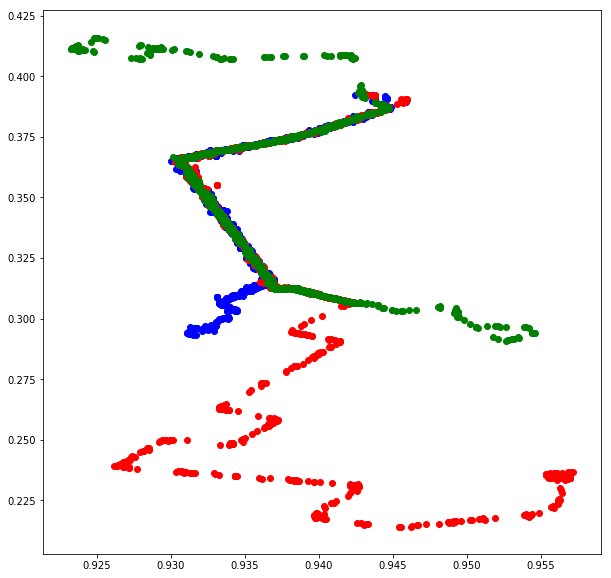

In [412]:
def prec_xgb(n_trees, max_depth, X_train, y_train, X_test, y_test, learning_rate=0.1):
    """
    ExtraTrees
    """
    import xgboost as xgb
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    clf = xgb.XGBClassifier(n_estimators=n_trees, max_depth=max_depth, objective='multi:softprob',
            seed=0, silent=True, nthread=-1, learning_rate=learning_rate)
    eval_set = [(X_test, y_test)]
    clf.fit(X_train, y_train, eval_set=eval_set, eval_metric='merror')
    y_pred = clf.predict(X_test)
    prec = float(np.sum(y_pred == y_test)) / len(y_test)
    return clf, y_pred
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
xr=pd.merge(data, xr, on=['log', 'lat','label','request_ts','trans_ts'], how='inner')
xr=xr.drop(['request_ts','trans_ts','day_sat','hour_sat','minute_sat','sec_sat','guess'],axis =1)
nn=np.array(xr['label'])
xr=xr.drop(['label'],axis=1)
clf,pred=prec_xgb(30,30,np.array(X),np.array(y),np.array(xr),nn)
print(metrics.accuracy_score(nn, pred))
print (Counter(pred))
ff=pd.DataFrame(pred,columns=['z'])
ff=ff.reindex(xr.index.values)
ff['z']=pred
xr=xr
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')

0.5692569256925692
['0' '0' '0' '0' ... '0' '0' '0' '0']
Counter({'0': 8357, '1': 1396, '2': 246})
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      4423
           1       0.75      0.31      0.44      3371
           2       1.00      0.11      0.20      2205

   micro avg       0.57      0.57      0.57      9999
   macro avg       0.76      0.47      0.44      9999
weighted avg       0.71      0.57      0.50      9999



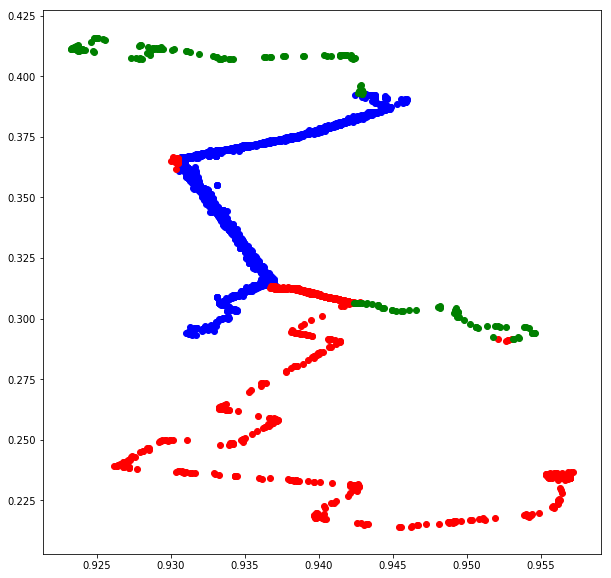

In [413]:
import matplotlib.pyplot as plt
dt.fit(X_train, y_train)
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
xr=pd.merge(data, xr, on=['log', 'lat','label','request_ts','trans_ts'], how='inner')
xr=xr.drop(['request_ts','trans_ts','day_sat','hour_sat','minute_sat','sec_sat','guess'],axis =1)
nn=np.array(xr['label'])
xr=xr.drop(['label'],axis=1)
accuracy = dt.score(xr, nn)
print(accuracy)
z=dt.predict(xr)
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(xr.index.values)
ff['z']=z
xr=xr
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
print (z)
print (Counter(z))
print(metrics.classification_report(nn, z))

0.5692569256925692
['0' '0' '0' '0' ... '0' '0' '0' '0']
Counter({'0': 8357, '1': 1396, '2': 246})
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      4423
           1       0.75      0.31      0.44      3371
           2       1.00      0.11      0.20      2205

   micro avg       0.57      0.57      0.57      9999
   macro avg       0.76      0.47      0.44      9999
weighted avg       0.71      0.57      0.50      9999



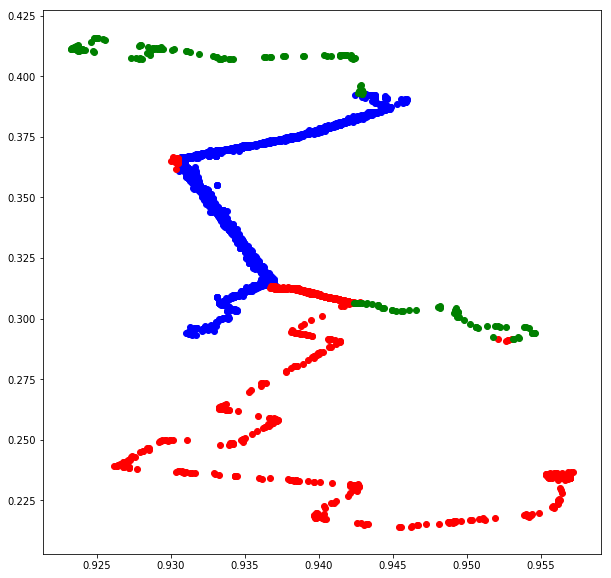

In [414]:
rf.fit(X_train, y_train)
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
xr=pd.merge(data, xr, on=['log', 'lat','label','request_ts','trans_ts'], how='inner')
xr=xr.drop(['request_ts','trans_ts','day_sat','hour_sat','minute_sat','sec_sat','guess'],axis =1)
nn=np.array(xr['label'])
xr=xr.drop(['label'],axis=1)
accuracy = dt.score(xr, nn)
print(accuracy)
z=dt.predict(xr)
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(xr.index.values)
ff['z']=z
xr=xr
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
print (z)
print (Counter(z))
print(metrics.classification_report(nn, z))

0.5692569256925692
['0' '0' '0' '0' ... '0' '0' '0' '0']
Counter({'0': 8357, '1': 1396, '2': 246})
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      4423
           1       0.75      0.31      0.44      3371
           2       1.00      0.11      0.20      2205

   micro avg       0.57      0.57      0.57      9999
   macro avg       0.76      0.47      0.44      9999
weighted avg       0.71      0.57      0.50      9999



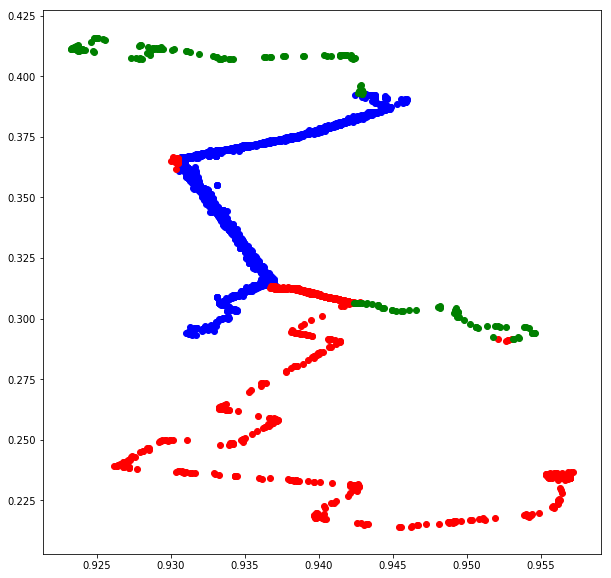

In [415]:
ab.fit(X_train, y_train)
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
xr=pd.merge(data, xr, on=['log', 'lat','label','request_ts','trans_ts'], how='inner')
xr=xr.drop(['request_ts','trans_ts','day_sat','hour_sat','minute_sat','sec_sat','guess'],axis =1)
nn=np.array(xr['label'])
xr=xr.drop(['label'],axis=1)
accuracy = dt.score(xr, nn)
print(accuracy)
z=dt.predict(xr)
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(xr.index.values)
ff['z']=z
xr=xr
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
print (z)
print (Counter(z))
print(metrics.classification_report(nn, z))

Counter({'0': 4423, '1': 3372, '2': 2205})


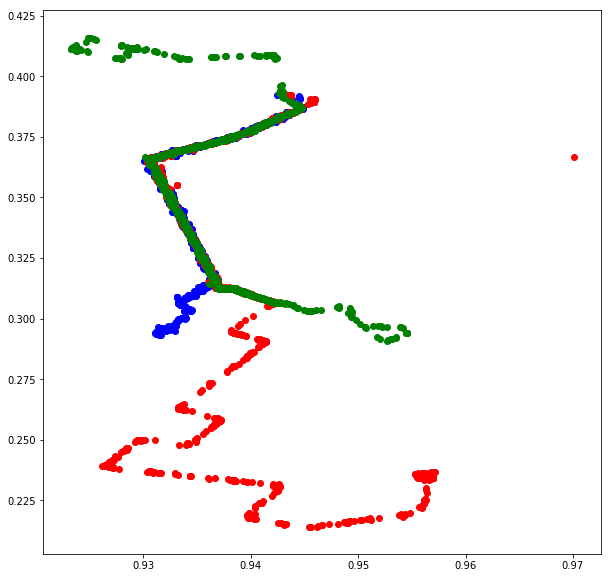

In [416]:
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
print (Counter(xr['label']))
one=xr[xr.label=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.label=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.label=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')

In [ ]:
#questions=questions.drop(['trans_ts','request_ts'],axis=1)
#questions=questions.drop(['guess'],axis=1)
rf.fit(X, y) 
out = open('transport_RF_50_standscale_withloop_664.txt', 'w')
z=rf.predict(questions)
print (Counter(z))
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(questions.index.values)
ff['z']=z
xr=questions
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
#for i in z:
#    out.write(i + '\n') 
#out.close()

Counter({'0': 2756, '2': 1297, '1': 947})


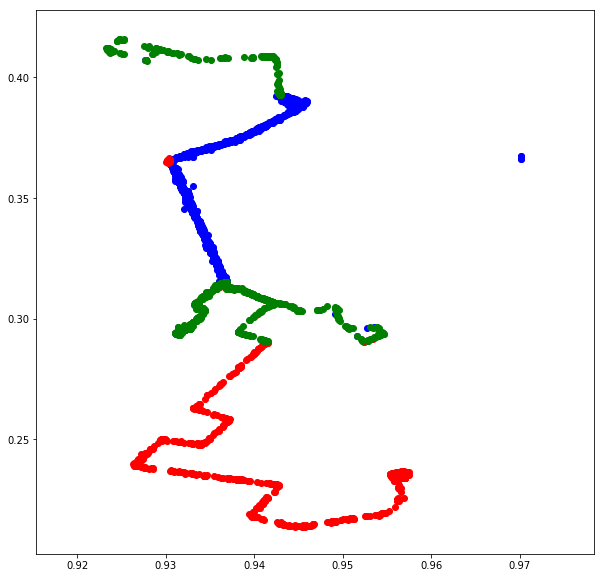

In [233]:
#questions=questions.drop(['trans_ts','request_ts'],axis=1)
dt.fit(X, y) 
out = open('transport_decisiontree_100_standscale_withloop_649.txt', 'w')
z=dt.predict(questions)
print (Counter(z))
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(questions.index.values)
ff['z']=z
xr=questions
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
#for i in z:
#    out.write(i + '\n') 
#out.close()

Counter({'0': 2946, '1': 1513, '2': 541})


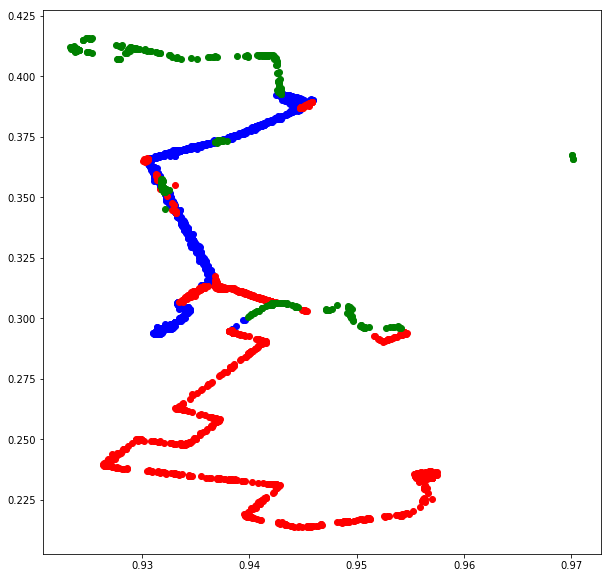

In [234]:
#questions=questions.drop(['trans_ts','request_ts'],axis=1)
ab.fit(X, y) 
out = open('transport_adaboost_200_standscale_withloop_646.txt', 'w')
z=ab.predict(questions)
print (Counter(z))
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(questions.index.values)
ff['z']=z
xr=questions
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
#for i in z:
#    out.write(i + '\n') 
#out.close()